# Employee Churn Analysis - Feature Engineering
---


- Age: Çalışanın yaşı (sayısal değer)
- Attrition: İşten ayrılma durumu (Yes/Evet veya No/Hayır)
- BusinessTravel: İş seyahati sıklığı (Travel_Rarely/Nadiren seyahat, Travel_Frequently/Sık sık seyahat, Non-Travel/Seyahat etmeme)
- DailyRate: Günlük ücret (sayısal değer)
- Department: Çalışanın çalıştığı departman (Sales/Satış, Research & Development/Araştırma ve Geliştirme, Human Resources/İnsan Kaynakları)
- DistanceFromHome: Evden işe olan mesafe (sayısal değer)
- Education: Eğitim düzeyi (sayısal değer)
- EducationField: Eğitim alanı (Life Sciences/Hayat Bilimleri, Technical Degree/Teknik Lisans, Human Resources/İnsan Kaynakları vb.)
- EmployeeCount: Çalışan sayısı (sabit değer)
- EmployeeNumber: Çalışan numarası (sayısal değer)
- EnvironmentSatisfaction: Çalışma ortamı memnuniyeti (sayısal değer)
- Gender: Cinsiyet (Female/Kadın veya Male/Erkek)
- HourlyRate: Saatlik ücret (sayısal değer)
- JobInvolvement: İşe dahil olma düzeyi (sayısal değer)
- JobLevel: İş seviyesi (sayısal değer)
- JobRole: İş rolü (Sales Executive/Satış Yöneticisi, Research Scientist/Araştırma Uzmanı vb.)
- JobSatisfaction: İş tatmini (sayısal değer)
- MaritalStatus: Medeni durum (Single/Bekar, Married/Evli, Divorced/Boşanmış)
- MonthlyIncome: Aylık gelir (sayısal değer)
- MonthlyRate: Aylık ücret (sayısal değer)
- NumCompaniesWorked: Çalışılan şirket sayısı (sayısal değer)
- Over18: 18 yaşından büyük olma durumu (Y/Evet)
- OverTime: Fazla mesai yapma durumu (Yes/Evet veya No/Hayır)
- PercentSalaryHike: Maaş artış yüzdesi (sayısal değer)
- PerformanceRating: Performans değerlendirmesi (sayısal değer)
- RelationshipSatisfaction: İlişki tatmini (sayısal değer)
- StandardHours: Standart çalışma saati (sabit değer)
- StockOptionLevel: Hisse senedi opsiyon düzeyi (sayısal değer)
- TotalWorkingYears: Toplam çalışma yılı (sayısal değer)
- TrainingTimesLastYear: Geçen yıl yapılan eğitim süresi (sayısal değer)
- WorkLifeBalance: İş-yaşam dengesi (sayısal değer)
- YearsAtCompany: Şirkette geçirilen yıl sayısı (sayısal değer)
- YearsInCurrentRole: Şu anki pozisyonda geçirilen yıl sayısı (sayısal değer)
- YearsSinceLastPromotion: Son terfi üzerinden geçen yıl sayısı (sayısal değer)
- YearsWithCurrManager: Mevcut yöneticiyle çalışılan yıl sayısı (sayısal değer)

---


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
import warnings
warnings.simplefilter(action="ignore")

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
df_ = pd.read_csv("hr_churn.csv")
df=df_

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [91]:
##################################
# GENEL RESİM
##################################

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(1470, 35)
##################### Types #####################
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSa

In [92]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [93]:
print(100 * df["Attrition"].value_counts() / len(df)) # yüzdesel olarak da  inceleyelim

No    83.878
Yes   16.122
Name: Attrition, dtype: float64


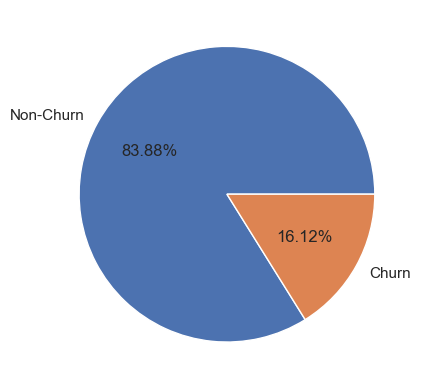

In [94]:
attrition_counts = df["Attrition"].value_counts()
attrition_pct = [100*attrition_counts[0]/(attrition_counts[0]+attrition_counts[1]), 
               100*attrition_counts[1]/(attrition_counts[0]+attrition_counts[1])]
labels = ["Non-Churn", "Churn"]

plt.pie(attrition_pct, labels=labels, autopct='%1.2f%%')
plt.show()

# Exploratory Data Analysis — Keşifsel Veri Analizi
---

In [95]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [96]:
yn_col =  ['Attrition','OverTime']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[yn_col] = df[yn_col].apply(binary_map)

In [97]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [98]:
# Her bir sütunda benzersiz değer sayısını hesapla
unique_counts = df.nunique()

# Sadece 1 veya daha az benzersiz değere sahip sütunları seç
selected_columns = unique_counts[unique_counts <= 1].index

# Seçilen sütunları yazdır
print(selected_columns)

# tüm veri setinde aynı değere sahipler veri setinde gerksiz durumda olduğundan çıkartabiliriz.

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [99]:
# Veri setinden seçilen sütunları çıkarttık.
df = df.drop(selected_columns, axis=1)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [100]:
 #Numerik ve kategorik değişkenleri yakalayalım.
def grab_col_names(dataframe, cat_th=5, car_th=8):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [101]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#1470 gözlem var, 32 değişken var , 14 tane kategorik değişken, 17 tane numarik değişken, categorik ama kardinal olan 1 değişken var, Numarik ama cardinal olan 9 değişken var    

Observations: 1470
Variables: 32
cat_cols: 14
num_cols: 17
cat_but_car: 1
num_but_cat: 9


In [102]:
cat_cols #kategorik değişkenler

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'MaritalStatus',
 'Attrition',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [103]:
num_cols #numarik değişkenler

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [104]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## Numarik Değişken Analizi
---

count   1470.000
mean      36.924
std        9.135
min       18.000
5%        24.000
10%       26.000
20%       29.000
30%       31.000
40%       34.000
50%       36.000
60%       38.000
70%       41.000
80%       45.000
90%       50.000
95%       54.000
99%       58.310
max       60.000
Name: Age, dtype: float64


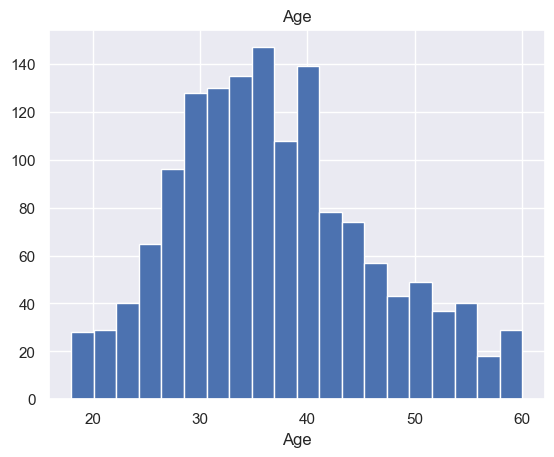

count   1470.000
mean     802.486
std      403.509
min      102.000
5%       165.350
10%      242.800
20%      391.800
30%      530.700
40%      656.200
50%      802.000
60%      942.400
70%     1094.600
80%     1224.200
90%     1356.000
95%     1424.100
99%     1485.000
max     1499.000
Name: DailyRate, dtype: float64


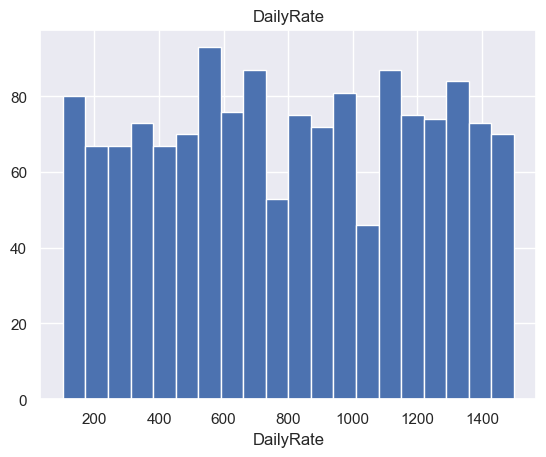

count   1470.000
mean       9.193
std        8.107
min        1.000
5%         1.000
10%        1.000
20%        2.000
30%        3.000
40%        5.000
50%        7.000
60%        9.000
70%       11.000
80%       17.000
90%       23.000
95%       26.000
99%       29.000
max       29.000
Name: DistanceFromHome, dtype: float64


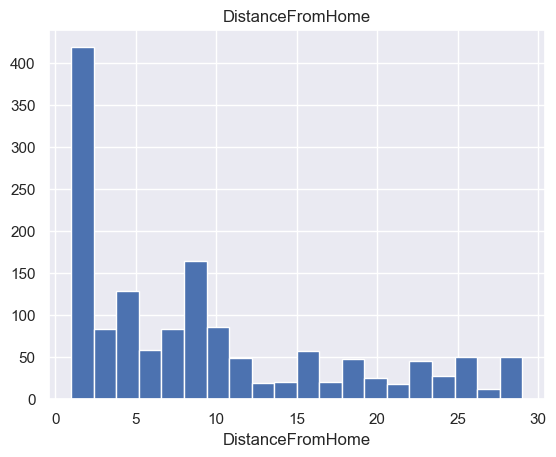

count   1470.000
mean       2.913
std        1.024
min        1.000
5%         1.000
10%        1.000
20%        2.000
30%        2.000
40%        3.000
50%        3.000
60%        3.000
70%        4.000
80%        4.000
90%        4.000
95%        4.000
99%        5.000
max        5.000
Name: Education, dtype: float64


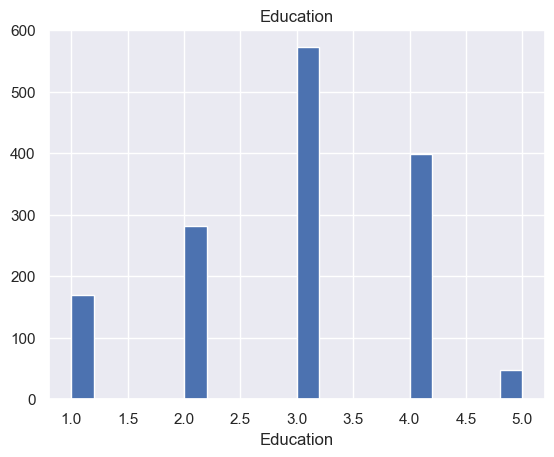

count   1470.000
mean    1024.865
std      602.024
min        1.000
5%        96.450
10%      198.900
20%      402.600
30%      590.700
40%      814.200
50%     1020.500
60%     1235.800
70%     1448.300
80%     1654.200
90%     1857.100
95%     1967.550
99%     2046.620
max     2068.000
Name: EmployeeNumber, dtype: float64


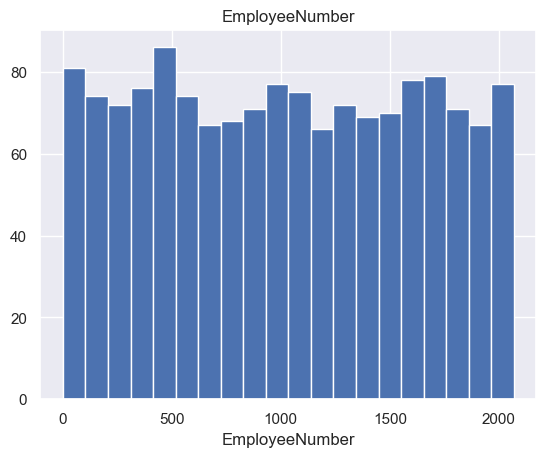

count   1470.000
mean      65.891
std       20.329
min       30.000
5%        33.000
10%       38.000
20%       45.000
30%       52.000
40%       59.000
50%       66.000
60%       73.000
70%       80.000
80%       87.000
90%       94.000
95%       97.000
99%      100.000
max      100.000
Name: HourlyRate, dtype: float64


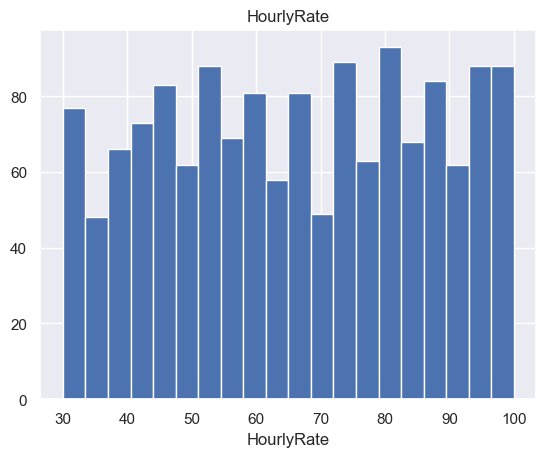

count   1470.000
mean       2.064
std        1.107
min        1.000
5%         1.000
10%        1.000
20%        1.000
30%        1.000
40%        2.000
50%        2.000
60%        2.000
70%        2.000
80%        3.000
90%        4.000
95%        4.000
99%        5.000
max        5.000
Name: JobLevel, dtype: float64


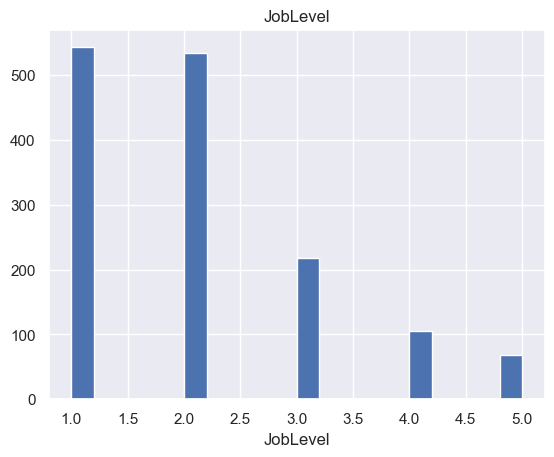

count    1470.000
mean     6502.931
std      4707.957
min      1009.000
5%       2097.900
10%      2317.600
20%      2695.800
30%      3316.900
40%      4228.800
50%      4919.000
60%      5743.400
70%      6886.000
80%      9860.000
90%     13775.600
95%     17821.350
99%     19626.310
max     19999.000
Name: MonthlyIncome, dtype: float64


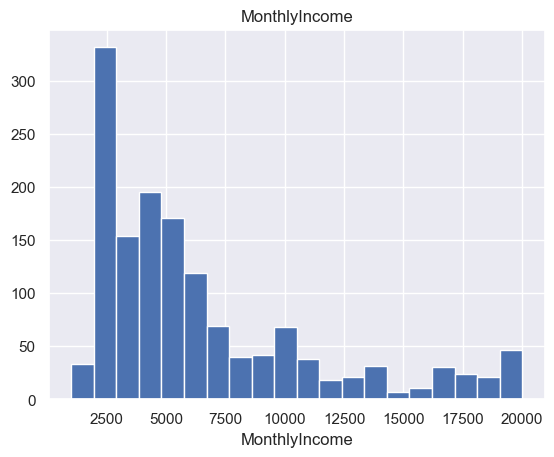

count    1470.000
mean    14313.103
std      7117.786
min      2094.000
5%       3384.550
10%      4603.000
20%      6887.400
30%      9255.700
40%     11773.000
50%     14235.500
60%     16714.200
70%     19376.000
80%     21712.000
90%     24001.700
95%     25431.900
99%     26704.240
max     26999.000
Name: MonthlyRate, dtype: float64


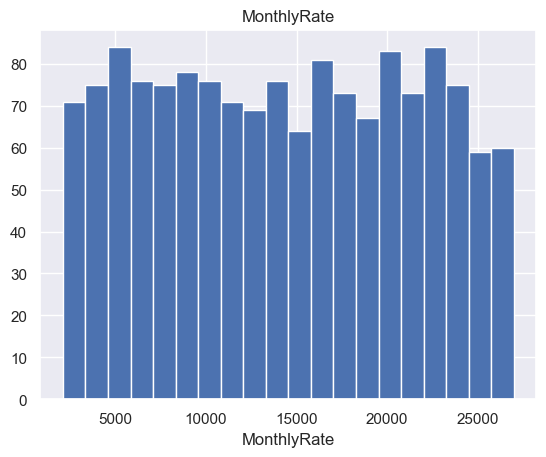

count   1470.000
mean       2.693
std        2.498
min        0.000
5%         0.000
10%        0.000
20%        1.000
30%        1.000
40%        1.000
50%        2.000
60%        3.000
70%        4.000
80%        5.000
90%        7.000
95%        8.000
99%        9.000
max        9.000
Name: NumCompaniesWorked, dtype: float64


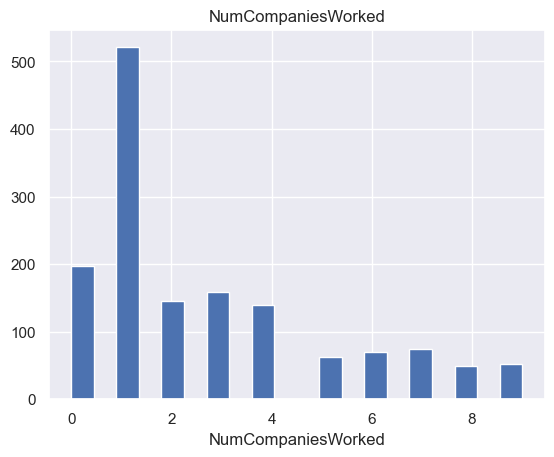

count   1470.000
mean      15.210
std        3.660
min       11.000
5%        11.000
10%       11.000
20%       12.000
30%       13.000
40%       13.000
50%       14.000
60%       15.000
70%       17.000
80%       19.000
90%       21.000
95%       22.000
99%       25.000
max       25.000
Name: PercentSalaryHike, dtype: float64


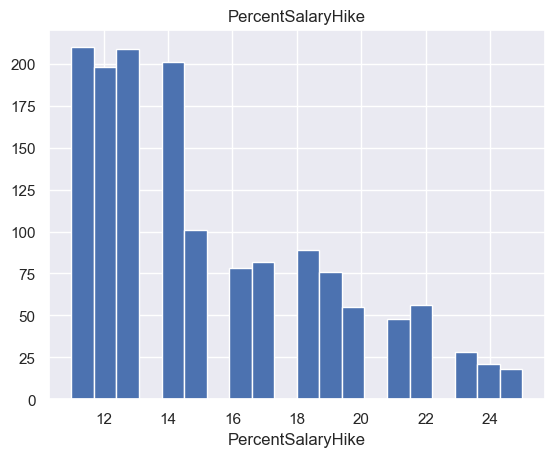

count   1470.000
mean      11.280
std        7.781
min        0.000
5%         1.000
10%        3.000
20%        5.000
30%        6.700
40%        8.000
50%       10.000
60%       10.000
70%       13.000
80%       17.000
90%       23.000
95%       28.000
99%       35.000
max       40.000
Name: TotalWorkingYears, dtype: float64


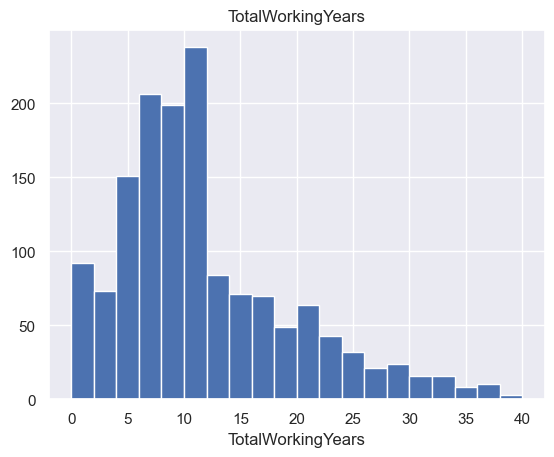

count   1470.000
mean       2.799
std        1.289
min        0.000
5%         1.000
10%        2.000
20%        2.000
30%        2.000
40%        2.000
50%        3.000
60%        3.000
70%        3.000
80%        4.000
90%        5.000
95%        5.000
99%        6.000
max        6.000
Name: TrainingTimesLastYear, dtype: float64


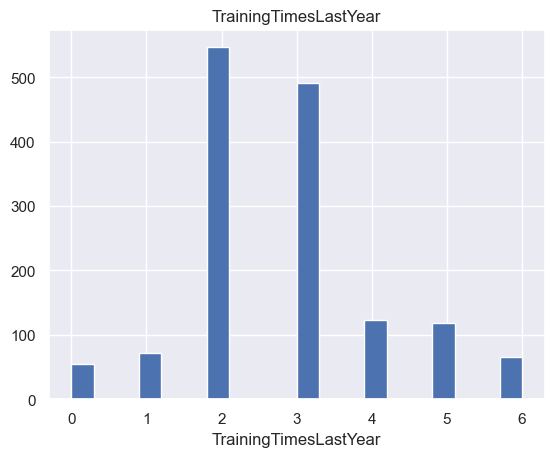

count   1470.000
mean       7.008
std        6.127
min        0.000
5%         1.000
10%        1.000
20%        2.000
30%        3.000
40%        5.000
50%        5.000
60%        7.000
70%        9.000
80%       10.000
90%       15.000
95%       20.000
99%       31.000
max       40.000
Name: YearsAtCompany, dtype: float64


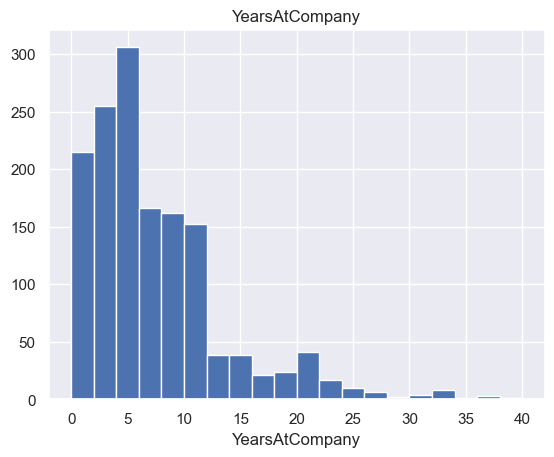

count   1470.000
mean       4.229
std        3.623
min        0.000
5%         0.000
10%        0.000
20%        1.000
30%        2.000
40%        2.000
50%        3.000
60%        4.000
70%        7.000
80%        7.000
90%        9.000
95%       11.000
99%       15.000
max       18.000
Name: YearsInCurrentRole, dtype: float64


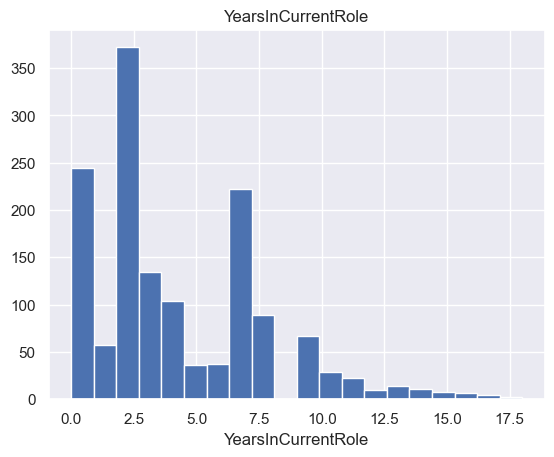

count   1470.000
mean       2.188
std        3.222
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        1.000
50%        1.000
60%        1.000
70%        2.000
80%        4.000
90%        7.000
95%        9.000
99%       14.000
max       15.000
Name: YearsSinceLastPromotion, dtype: float64


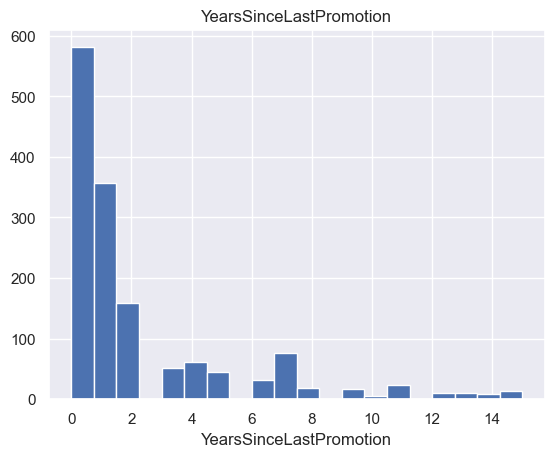

count   1470.000
mean       4.123
std        3.568
min        0.000
5%         0.000
10%        0.000
20%        1.000
30%        2.000
40%        2.000
50%        3.000
60%        4.000
70%        7.000
80%        7.000
90%        9.000
95%       10.000
99%       14.000
max       17.000
Name: YearsWithCurrManager, dtype: float64


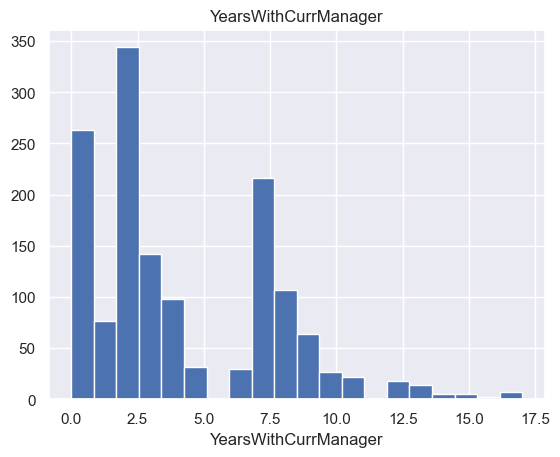

In [105]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

**Analitik Yorum**
---

- **Age (Yaş):** Dağılımın nispeten normal bir yapıda olduğu görülmektedir. Veri setindeki çalışanların yaşları genellikle orta yaş aralığında yoğunlaşmıştır.

- **DistanceFromHome (Evden Uzaklık):** Verilerin çoğunluğu düşük uzaklıklarda yoğunlaşmıştır, bu da çalışanların genellikle yakın bir mesafede çalıştığını göstermektedir. Dağılım sağa çekik olduğu için uzaklık değerleri arttıkça gözlem sayısı azalmaktadır.

- **MonthlyIncome (Aylık Gelir):** Dağılım sağa çekiktir, yani yüksek gelir değerleri daha seyrektir. Veri setindeki çalışanların çoğunluğu orta gelir düzeyinde yer almaktadır.

- **MonthlyRate (Aylık Ücret):** Dağılımın nispeten normal bir yapıya sahip olduğu görülmektedir. Aylık ücretler genellikle belirli bir aralıkta yoğunlaşmıştır.

- **NumCompaniesWorked (Çalışılan Şirket Sayısı):** Verilerin çoğunluğu düşük değerlerde yoğunlaşmıştır, yani çalışanların büyük çoğunluğu sınırlı sayıda şirkette çalışmıştır.

- **PercentSalaryHike (Maaş Artış Yüzdesi):** Dağılımın nispeten normal bir yapıya sahip olduğu görülmektedir. Maaş artış yüzdeleri genellikle belirli bir aralıkta yoğunlaşmıştır.

- **TotalWorkingYears (Toplam Çalışma Yılı):** Verilerin çoğunluğu düşük değerlerde yoğunlaşmıştır, yani çalışanların çoğunluğu sınırlı sayıda çalışma yılına sahiptir.

- **YearsAtCompany (Şirkette Geçen Yıl Sayısı):** Verilerin çoğunluğu düşük değerlerde yoğunlaşmıştır, yani çalışanların çoğu kısa sürelerle şirkette çalışmıştır.

- **YearsInCurrentRole (Mevcut Pozisyonda Geçen Yıl Sayısı):** Verilerin çoğunluğu düşük değerlerde yoğunlaşmıştır, bu da çalışanların genellikle kısa sürelerle mevcut pozisyonlarında kaldığını göstermektedir.

- **YearsSinceLastPromotion (Son Terfi Yılı):** Verilerin çoğunluğu düşük değerlerde yoğunlaşmıştır, yani çalışanların çoğu son terfilerini kısa süre önce almıştır. 

- **YearsWithCurrManager (Mevcut Yöneticiyle Geçen Yıl Sayısı):** Verilerin çoğunluğu düşük değerlerde yoğunlaşmıştır, yani çalışanların çoğu mevcut yöneticileriyle kısa süreler geçirmiştir.

In [106]:
#NUMERİK DEĞİŞKENLERİN Attrition GÖRE ANALİZİ
mean_att= df.groupby("Attrition")[num_cols].agg("mean").reset_index()
mean_att

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,37.561,812.504,8.916,2.927,1027.656,65.952,2.146,6832.740,14265.779,2.646,15.231,11.863,2.833,7.369,4.484,2.234,4.367
1,1,33.608,750.363,10.633,2.840,1010.346,65.574,1.637,4787.093,14559.308,2.941,15.097,8.245,2.624,5.131,2.903,1.945,2.852


### İSTATİSTIK YORUMU
---
- **Age:** Attrition durumu "0" olanlarla karşılaştırıldığında, Attrition durumu "1" olan çalışanların ortalama yaşının biraz daha düşük olduğu görülüyor. Bu, genç veya daha az deneyimli çalışanların ayrılma eğilimine sahip olabileceğini gösteriyor.

- **DistanceFromHome:** Attrition durumu "1" olan çalışanların, Attrition durumu "0" olanlara kıyasla ev ile iş yeri arasındaki ortalama mesafenin biraz daha yüksek olduğu görülüyor. Bu, uzak mesafelerin ayrılma riskini artırabileceğini gösteriyor.

- **Education (Eğitim Seviyesi):** Attrition durumu "1" olan çalışanların ortalama eğitim seviyesi, Attrition durumu "0" olanlara kıyasla biraz daha düşük görünüyor. Daha düşük eğitim seviyesine sahip çalışanların ayrılma riski daha yüksek olabilir.

- **JobLevel (İş Seviyesi):** Attrition durumu "1" olan çalışanların ortalama iş seviyesi, Attrition durumu "0" olanlara kıyasla biraz daha düşük görünüyor. Daha düşük iş seviyesine sahip çalışanların ayrılma riski daha yüksek olabilir.

- **MonthlyIncome (Aylık Gelir):** Attrition durumu "1" olan çalışanların ortalama aylık geliri, Attrition durumu "0" olanlara kıyasla biraz daha düşük görünüyor. Daha düşük gelire sahip çalışanların ayrılma riski daha yüksek olabilir.

- **NumCompaniesWorked (Çalışılan Şirket Sayısı):** Ayrılanların ortalama mevcut pozisyonda çalışma süresi 2.903 iken ayrılmayanların ortalama mevcut pozisyonda çalışma süresi 4.484 olarak görülmektedir. Daha kısa sürelerle aynı pozisyonda çalışanların ayrılma eğilimi daha yüksek olabilir.


### GENEL DEĞERLENDİRME:
---
- Attrition durumu "1" olan çalışanla(churn) genellikle daha genç, daha az deneyimli, daha düşük eğitim seviyesine sahip, düşük iş seviyesinde çalışan ve daha düşük gelire sahip olan kişilerdir. 
- Ayrıca, ev ile iş yeri arasındaki mesafenin uzun olması ve daha fazla şirkette çalışmış olma da attrition riskini(Churn) artırabilecek faktörlerdir. 
- Bu bulgular, işten ayrılma eğiliminde olan çalışanları tanımlamak ve attrition riskini yönetmek için önemli bilgiler sağlayabilir.

- Numarik değişkenlerimizi hedef değişkene göre incelediğimizde daha çok etkiye sahip olan MonthlyIncome,TotalWorkingYears	, YearsAtCompany,YearsInCurrentRole ve YearsWithCurrManager değişkenlerinin işten ayrılma durumları  arasında farklılıklar olduğunu görüntülüyoruz.

### Genel Sonuç 
---

- Analiz sonucunda, çoğu sayısal değişkenin dağılımlarının sağa çekik olduğu ve verilerin genellikle düşük değerlerde yoğunlaştığı görülmektedir. 
Bu da çalışanların genellikle daha genç yaşta, kısa sürelerle şirkette ve mevcut pozisyonlarında kaldığını, düşük maaş artış yüzdelerine ve sınırlı sayıda şirkette çalıştığını göstermektedir.

- Özellikle MonthlyIncome (Aylık Gelir) ve TotalWorkingYears (Toplam Çalışma Yılı) değişkenlerinin işten ayrılma durumunda önemli etkilere sahip olabileceği düşünülebilir. 
Daha yüksek aylık gelire sahip olan çalışanlar ve daha uzun sürelerle çalışmış olanlar, işten ayrılma olasılığı daha düşük olabilir.

## Katagorik Değişken Analizi
---

In [107]:
def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
    print("###################################")
    if plot:
        sns.countplot(x=df[col_name], data=df)
        plt.show()

                   BusinessTravel  Ratio
Travel_Rarely                1043 70.952
Travel_Frequently             277 18.844
Non-Travel                    150 10.204
###################################


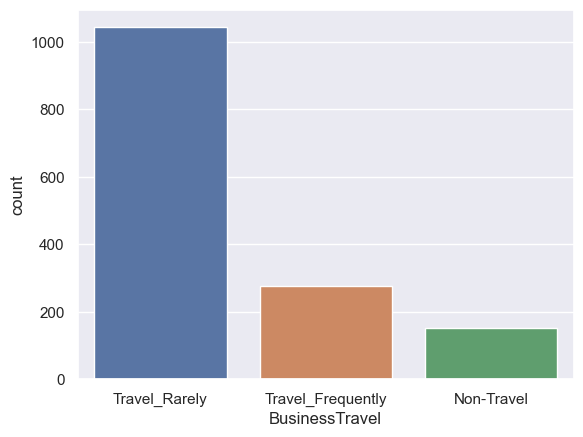

                        Department  Ratio
Research & Development         961 65.374
Sales                          446 30.340
Human Resources                 63  4.286
###################################


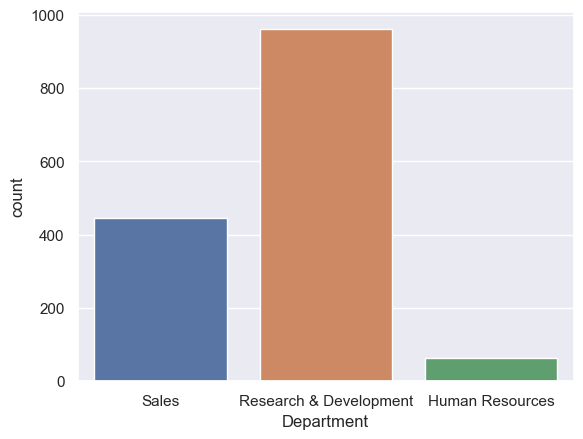

                  EducationField  Ratio
Life Sciences                606 41.224
Medical                      464 31.565
Marketing                    159 10.816
Technical Degree             132  8.980
Other                         82  5.578
Human Resources               27  1.837
###################################


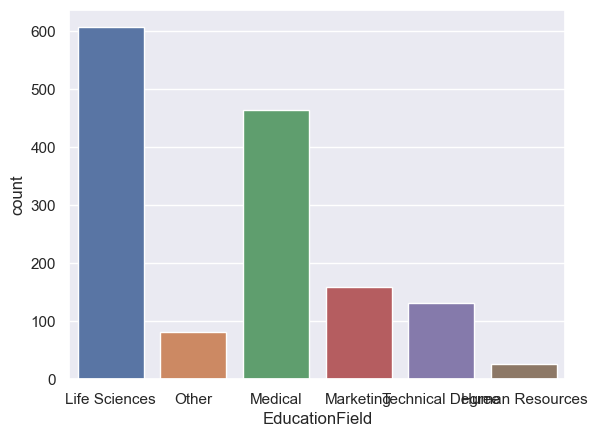

        Gender  Ratio
Male       882 60.000
Female     588 40.000
###################################


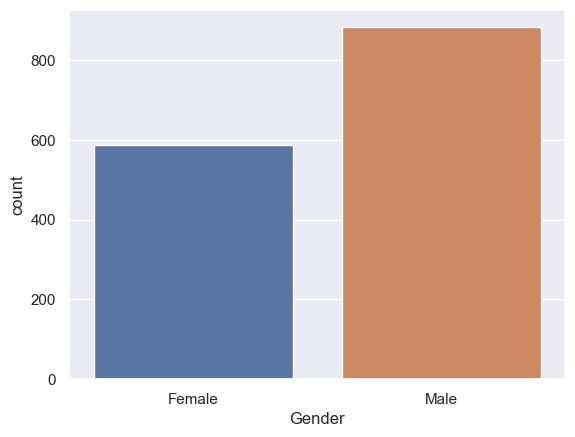

          MaritalStatus  Ratio
Married             673 45.782
Single              470 31.973
Divorced            327 22.245
###################################


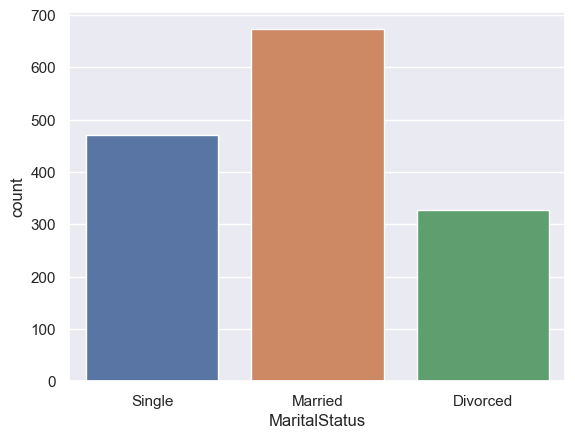

   Attrition  Ratio
0       1233 83.878
1        237 16.122
###################################


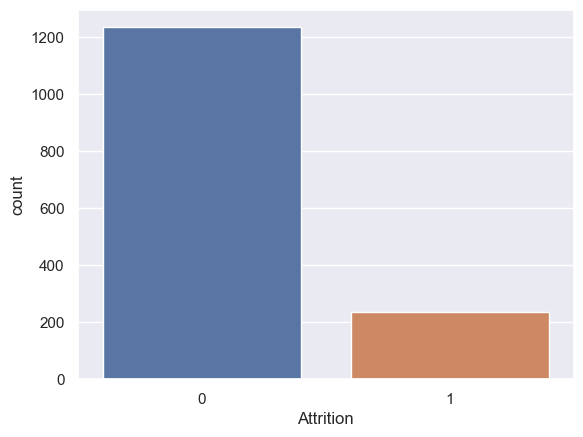

   EnvironmentSatisfaction  Ratio
3                      453 30.816
4                      446 30.340
2                      287 19.524
1                      284 19.320
###################################


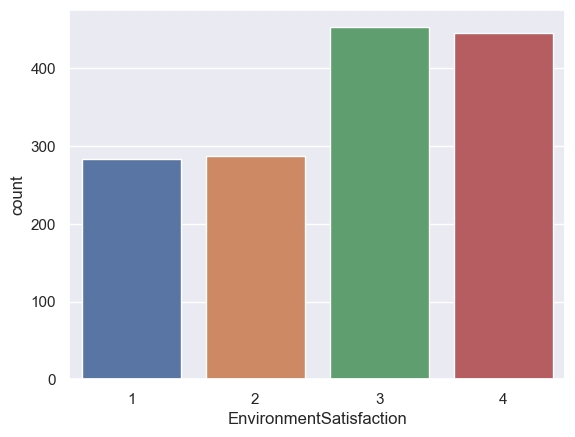

   JobInvolvement  Ratio
3             868 59.048
2             375 25.510
4             144  9.796
1              83  5.646
###################################


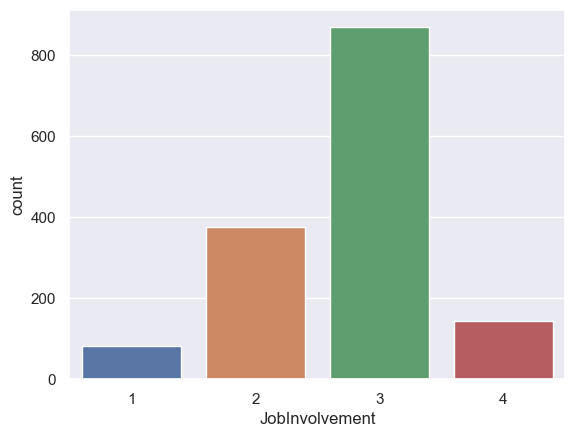

   JobSatisfaction  Ratio
4              459 31.224
3              442 30.068
1              289 19.660
2              280 19.048
###################################


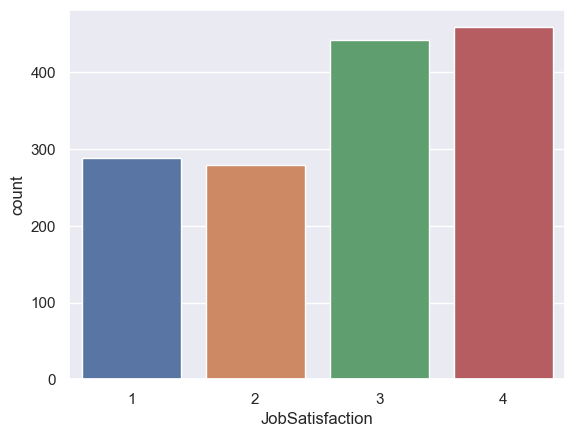

   OverTime  Ratio
0      1054 71.701
1       416 28.299
###################################


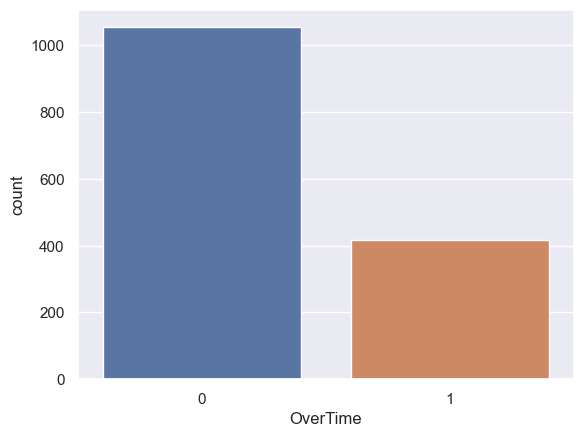

   PerformanceRating  Ratio
3               1244 84.626
4                226 15.374
###################################


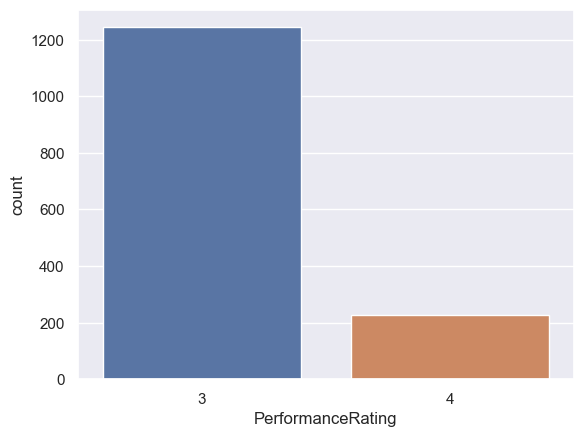

   RelationshipSatisfaction  Ratio
3                       459 31.224
4                       432 29.388
2                       303 20.612
1                       276 18.776
###################################


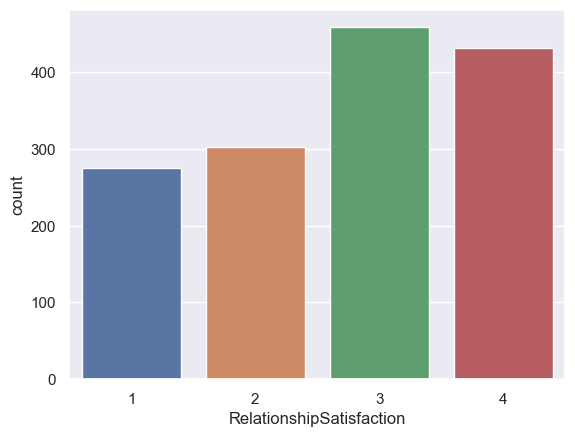

   StockOptionLevel  Ratio
0               631 42.925
1               596 40.544
2               158 10.748
3                85  5.782
###################################


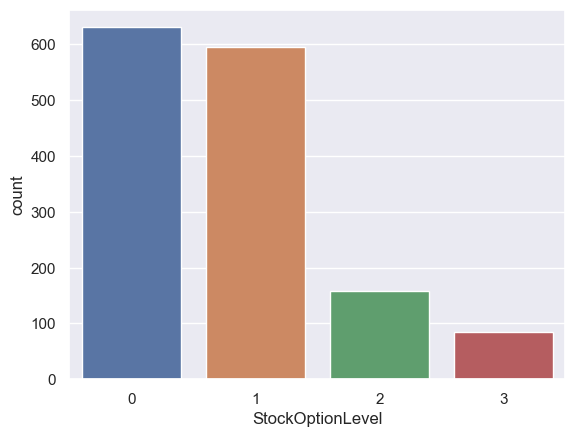

   WorkLifeBalance  Ratio
3              893 60.748
2              344 23.401
4              153 10.408
1               80  5.442
###################################


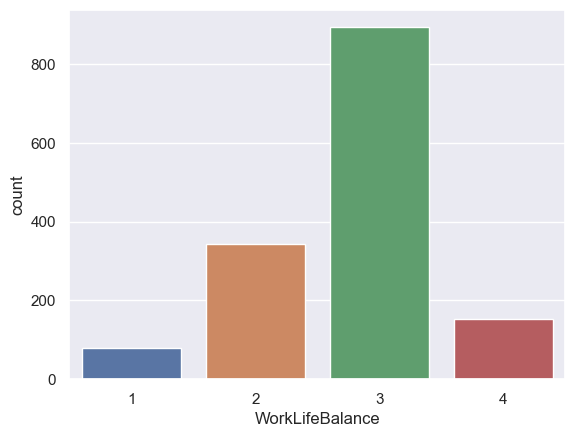

In [108]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

### Analitik Yorum
---
- **BusinessTravel:** Seyahat sıklığına göre en yaygın tercih "Travel_Rarely" (%70.952) iken, "Travel_Frequently" (%18.844) ve "Non-Travel" (%10.204) daha az tercih edilen seçeneklerdir. Çalışanların çoğunluğu seyahatlerini nadiren yapmaktadır.

- **Department:** Araştırma ve geliştirme departmanı ("Research & Development") %65.374'lük oranıyla en yüksek sayıya sahiptir. Diğer departmanlar ise daha düşük oranlara sahiptir: satış departmanı ("Sales") %30.340 ve insan kaynakları departmanı ("Human Resources") %4.286.

- **EducationField:** "Life Sciences" (%41.224) ve "Medical" (%31.565) alanları, diğer alanlara kıyasla daha fazla çalışana sahiptir. "Marketing" (%10.816), "Technical Degree" (%8.980), "Other" (%5.578) ve "Human Resources" (%1.837) ise daha düşük oranlara sahiptir.

- **MaritalStatus:** Evli olanlar ("Married") %45.782'lik oranla en yüksek sayıya sahiptir. Bekar olanlar ("Single") %31.973 ve boşanmış olanlar ("Divorced") %22.245 oranlarıyla daha düşük sayılara sahiptir.

- **Attrition:** Veri setindeki çalışanların %16.122'si ayrılmıştır, %83.878'i ise ayrılmamıştır. Bu, attrition (işten ayrılma) oranının belirli bir süre için önemli bir faktör olduğunu göstermektedir.

- **OverTime:** Çalışanların %28.299'u fazla mesai yapmaktadır (OverTime=1), %71.701'i ise fazla mesai yapmamaktadır (OverTime=0). Bu dönüşüm, fazla mesai yapmanın diğer değişkenlerle ilişkisini incelememize olanak tanır.

- **Gender:** Veri setindeki çalışanların %60.000'i erkektir (Gender=1), %40.000'i ise kadındır (Gender=0). Bu dönüşüm, cinsiyetin diğer değişkenlerle ilişkisini analiz etmemizi sağlar.


In [109]:
#KATEGORİK DEĞİŞKENLERİN Attrition GÖRE ANALİZİ
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"Churn_Yüzdesi": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Attrition", col)

BusinessTravel
                   Churn_Yüzdesi  Count  Ratio
Non-Travel                 0.080    150 10.204
Travel_Frequently          0.249    277 18.844
Travel_Rarely              0.150   1043 70.952


Department
                        Churn_Yüzdesi  Count  Ratio
Human Resources                 0.190     63  4.286
Research & Development          0.138    961 65.374
Sales                           0.206    446 30.340


EducationField
                  Churn_Yüzdesi  Count  Ratio
Human Resources           0.259     27  1.837
Life Sciences             0.147    606 41.224
Marketing                 0.220    159 10.816
Medical                   0.136    464 31.565
Other                     0.134     82  5.578
Technical Degree          0.242    132  8.980


Gender
        Churn_Yüzdesi  Count  Ratio
Female          0.148    588 40.000
Male            0.170    882 60.000


MaritalStatus
          Churn_Yüzdesi  Count  Ratio
Divorced          0.101    327 22.245
Married           0.125    6

# Analitik Yorum
---
- BusinessTravel: Seyahat sıklığına göre, "Travel_Rarely" kategorisinde çalışanların ayrılma yüzdesi en yüksek (%15), ardından "Travel_Frequently" (%12.5) ve "Non-Travel" (%8) kategorileri gelmektedir.

- Department: Departmanlara göre, "Sales" departmanında çalışanların ayrılma yüzdesi en yüksek (%20.6), ardından "Human Resources" (%19) ve "Research & Development" (%13.8) departmanları gelmektedir.

- EducationField: Eğitim alanına göre, "Human Resources" alanında çalışanların ayrılma yüzdesi en yüksek (%25.9), ardından "Technical Degree" (%24.2) ve "Marketing" (%22) alanları gelmektedir.

- MaritalStatus: Medeni duruma göre, "Single" olan çalışanların ayrılma yüzdesi en yüksek (%25.5), ardından "Married" (%12.5) ve "Divorced" (%10.1) gelmektedir.

- Attrition: İşten ayrılma durumuna göre, ayrılanların yüzdesi (%16.1) ile ayrılmayanların yüzdesi (%83.9) verilmiştir.

- EnvironmentSatisfaction: Çevre memnuniyetine göre, düşük memnuniyet düzeyine sahip olanların ayrılma yüzdesi (%25.4) en yüksek, ardından orta (%15), yüksek (%13.7) ve çok düşük (%13.5) memnuniyet düzeylerine sahip olanlar gelmektedir.

- Gender: Cinsiyete göre, kadınların ayrılma yüzdesi (%17) erkeklerin ayrılma yüzdesi (%14.8) ile karşılaştırıldığında biraz daha yüksektir.

- JobInvolvement: İşe katılıma göre, düşük katılıma sahip olanların ayrılma yüzdesi (%33.7) en yüksek, ardından yüksek (%14.4), orta (%18.9) ve çok yüksek (%9) katılıma sahip olanlar gelmektedir.

- JobSatisfaction: İş memnuniyetine göre, düşük memnuniyet düzeyine sahip olanların ayrılma yüzdesi (%22.8) en yüksek, ardından orta (%16.4), yüksek (%16.5) ve çok yüksek (%11.3) memnuniyet düzeylerine sahip olanlar gelmektedir.

- OverTime: Fazla mesai yapma durumuna göre, fazla mesai yapmayanların ayrılma yüzdesi (%10.4) fazla mesai yapanların ayrılma yüzdesi (%30.5)

- PerformanceRating: Performans değerlendirmesine göre, yüksek performans değerlendirmesi alanların ayrılma yüzdesi (%16.4) daha düşük, düşük performans değerlendirmesi alanların ayrılma yüzdesi (%16.1) ise biraz daha yüksektir.

- RelationshipSatisfaction: İlişki memnuniyetine göre, düşük memnuniyet düzeyine sahip olanların ayrılma yüzdesi (%20.7) en yüksek, ardından orta (%15.5), yüksek (%14.9) ve çok yüksek (%14.8) memnuniyet düzeylerine sahip olanlar gelmektedir.

- StockOptionLevel: Hisse senedi opsiyon seviyesine göre, hisse senedi opsiyonu olmayanların ayrılma yüzdesi (%24.4) en yüksek, ardından düşük (%9.4), orta (%7.6) ve yüksek (%17.6) hisse senedi opsiyon seviyesine sahip olanlar gelmektedir.

- WorkLifeBalance: İş-yaşam dengesine göre, düşük dengeye sahip olanların ayrılma yüzdesi (%31.2) en yüksek, ardından orta (%14.2), yüksek (%17.6) ve çok yüksek (%10.4) iş-yaşam denge düzeyine sahip olanlar gelmektedir.



### GENEL DEĞERLENDİRME:
---
- Seyahat sıklığı çalışanların istifa oranını etkileyebilir. Özellikle sık seyahat eden çalışanların istifa oranının daha yüksek olduğu gözlenmektedir. Bu durum, iş ve özel yaşamları arasındaki dengeyi sağlama zorluğu, iş stresi ve yorgunluk gibi faktörlerden kaynaklanabilir.

- Departmanlar arasında istifa oranlarında farklılıklar bulunmaktadır. İnsan Kaynakları departmanında istifa oranının diğer departmanlara göre daha yüksek olduğu - görülmektedir. Bu durum, departmanın çalışanların memnuniyetini sağlamada veya motivasyonlarını yüksek tutmada daha fazla zorlukla karşılaşabileceğini düşündürebilir.

- Eğitim alanlarına göre istifa oranlarında farklılıklar mevcuttur. Özellikle İnsan Kaynakları alanında çalışanların istifa oranının diğer alanlara göre daha yüksek olduğu gözlenmektedir. Bu durum, çalışanların eğitim alanları ve kariyer hedefleri arasındaki uyumsuzluktan kaynaklanabilir.

- Cinsiyet bazında istifa oranlarında farklılıklar vardır. Verilere göre, erkek çalışanların istifa oranının kadın çalışanlara göre biraz daha yüksek olduğu görülmektedir. Ancak, bu farkın nedeni tam olarak belirlenememektedir ve daha detaylı analizler gerektirebilir.

- Bu çıkarımlar, şirketin insan kaynakları politikaları ve çalışma koşullarını değerlendirirken göz önünde bulundurulabilir. Örneğin, seyahat sıklığını azaltma, departmanlar arası dengeyi sağlama, çalışanların eğitim ve kariyer beklentilerini göz önünde bulundurma gibi önlemler alınabilir.

# Korelasyon Analizi
---

In [110]:
corr = df[num_cols].corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000,0.011,-0.002,0.208,-0.010,0.024,0.510,0.498,0.028,0.300,0.004,0.680,-0.020,0.311,0.213,0.217,0.202
DailyRate,0.011,1.000,-0.005,-0.017,-0.051,0.023,0.003,0.008,-0.032,0.038,0.023,0.015,0.002,-0.034,0.010,-0.033,-0.026
DistanceFromHome,-0.002,-0.005,1.000,0.021,0.033,0.031,0.005,-0.017,0.027,-0.029,0.040,0.005,-0.037,0.010,0.019,0.010,0.014
Education,0.208,-0.017,0.021,1.000,0.042,0.017,0.102,0.095,-0.026,0.126,-0.011,0.148,-0.025,0.069,0.060,0.054,0.069
EmployeeNumber,-0.010,-0.051,0.033,0.042,1.000,0.035,-0.019,-0.015,0.013,-0.001,-0.013,-0.014,0.024,-0.011,-0.008,-0.009,-0.009
HourlyRate,0.024,0.023,0.031,0.017,0.035,1.000,-0.028,-0.016,-0.015,0.022,-0.009,-0.002,-0.009,-0.020,-0.024,-0.027,-0.020
JobLevel,0.510,0.003,0.005,0.102,-0.019,-0.028,1.000,0.950,0.040,0.143,-0.035,0.782,-0.018,0.535,0.389,0.354,0.375
MonthlyIncome,0.498,0.008,-0.017,0.095,-0.015,-0.016,0.950,1.000,0.035,0.150,-0.027,0.773,-0.022,0.514,0.364,0.345,0.344
MonthlyRate,0.028,-0.032,0.027,-0.026,0.013,-0.015,0.040,0.035,1.000,0.018,-0.006,0.026,0.001,-0.024,-0.013,0.002,-0.037
NumCompaniesWorked,0.300,0.038,-0.029,0.126,-0.001,0.022,0.143,0.150,0.018,1.000,-0.010,0.238,-0.066,-0.118,-0.091,-0.037,-0.110


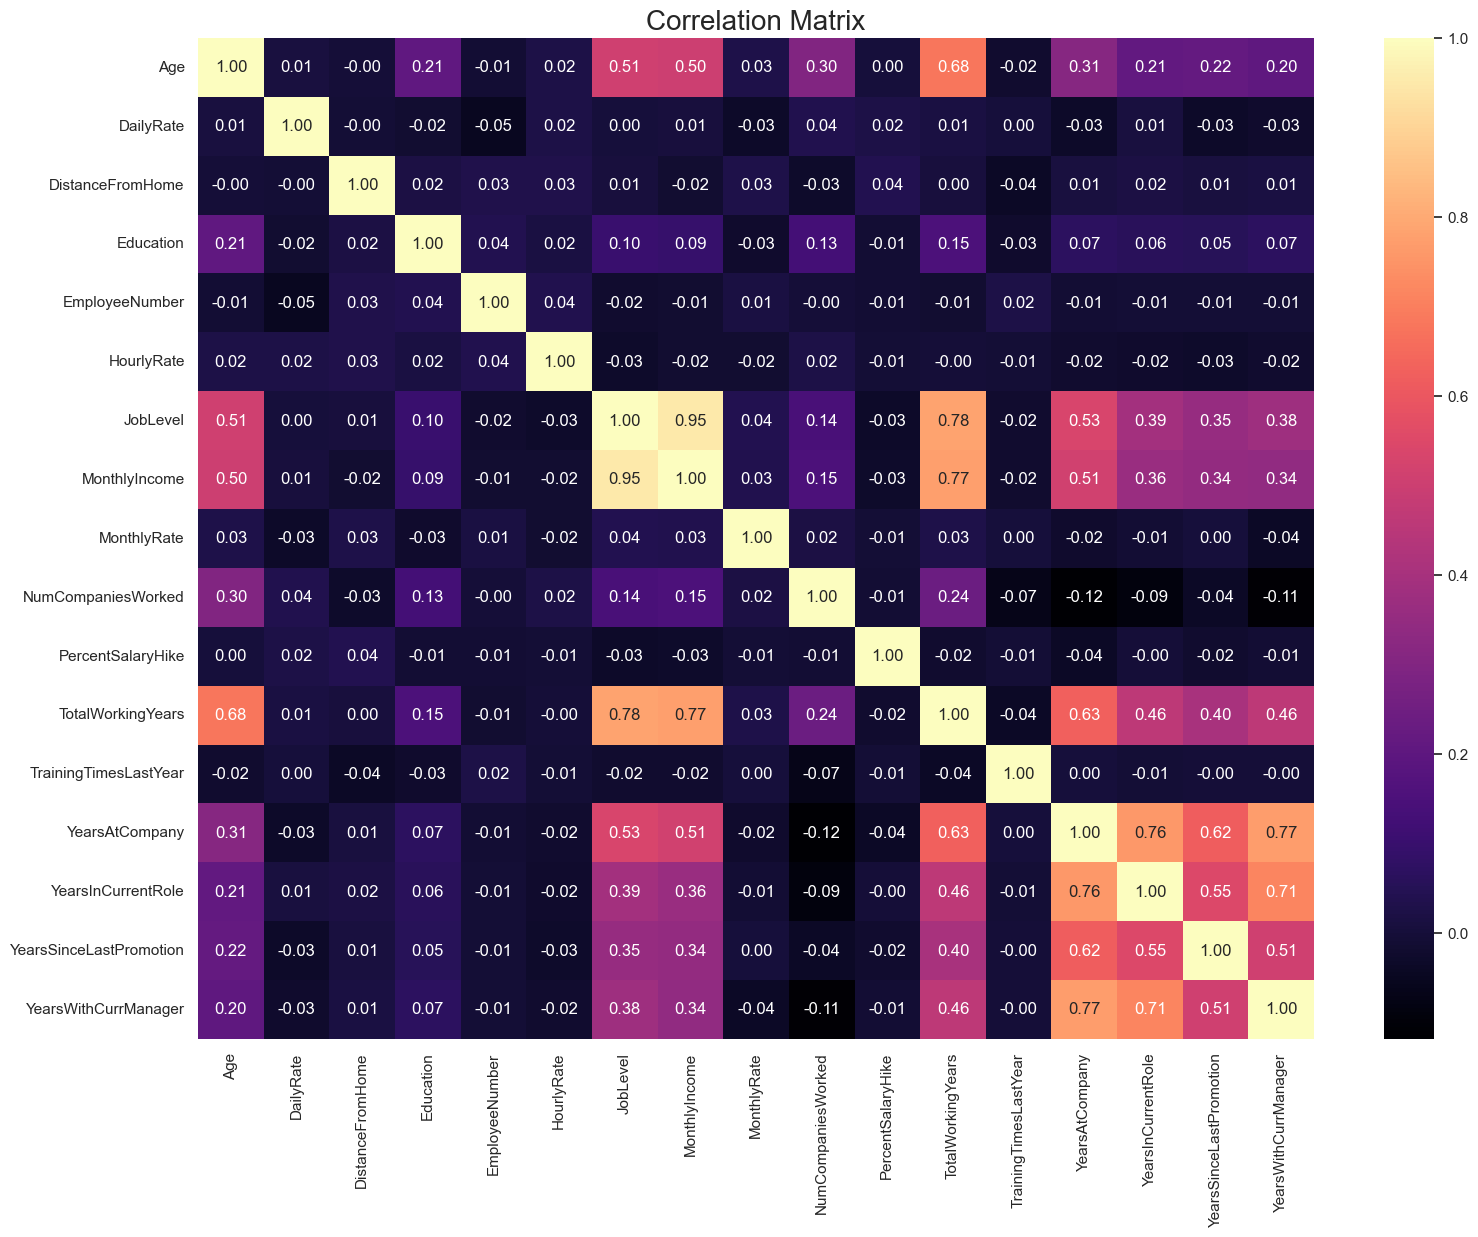

In [111]:
df[num_cols].corr()

# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

**Tabloydaki verilere göre aralarında güçlü ilişki olan değişkenler**

---

- Age (Yaş) - JobLevel (İş Seviyesi):

İki değişken arasında 0.510 korelasyon katsayısı bulunmaktadır.
Yaşın artması, iş seviyesinin yükselmesiyle güçlü bir ilişki içerisindedir.

- JobLevel (İş Seviyesi) - MonthlyIncome (Aylık Gelir):

İki değişken arasında 0.950 korelasyon katsayısı bulunmaktadır.
İş seviyesinin yükselmesi, aylık gelirin artmasıyla güçlü bir ilişki içerisindedir.

- JobLevel (İş Seviyesi) - TotalWorkingYears (Toplam Çalışma Yılı):

İki değişken arasında 0.760 korelasyon katsayısı bulunmaktadır.
İş seviyesinin yükselmesi, toplam çalışma yılı ile güçlü bir ilişki içerisindedir.

- MonthlyIncome (Aylık Gelir) - TotalWorkingYears (Toplam Çalışma Yılı):

İki değişken arasında 0.747 korelasyon katsayısı bulunmaktadır.
Toplam çalışma yılının artması, aylık gelirin artmasıyla güçlü bir ilişki içerisindedir.

- YearsAtCompany (Şirkette Geçen Yıl Sayısı) - YearsInCurrentRole (Mevcut Pozisyondaki Geçen Yıl Sayısı):

İki değişken arasında 0.759 korelasyon katsayısı bulunmaktadır.
Şirkette geçen yıl sayısının artması, mevcut pozisyondaki geçen yıl sayısının artmasıyla güçlü bir ilişki içerisindedir.

- YearsAtCompany (Şirkette Geçen Yıl Sayısı) - YearsWithCurrManager (Mevcut Yöneticiyle Geçen Yıl Sayısı):

İki değişken arasında 0.765 korelasyon katsayısı bulunmaktadır.
Şirkette geçen yıl sayısının artması, mevcut yöneticiyle geçen yıl sayısının artmasıyla güçlü bir ilişki içerisindedir.

Bu değişkenler arasında gözlenen güçlü ilişkiler, birbirleriyle yakından ilişkili olduklarını ve bir değişkenin değerinin diğerini etkileyebileceğini göstermektedir.

In [112]:
df.corrwith(df["Attrition"]).sort_values(ascending=False)

#OverTime ile  DistanceFromHome yüksek korelasyonlu olduğu görülmekte

Attrition                   1.000
OverTime                    0.246
DistanceFromHome            0.078
NumCompaniesWorked          0.043
MonthlyRate                 0.015
PerformanceRating           0.003
HourlyRate                 -0.007
EmployeeNumber             -0.011
PercentSalaryHike          -0.013
Education                  -0.031
YearsSinceLastPromotion    -0.033
RelationshipSatisfaction   -0.046
DailyRate                  -0.057
TrainingTimesLastYear      -0.059
WorkLifeBalance            -0.064
EnvironmentSatisfaction    -0.103
JobSatisfaction            -0.103
JobInvolvement             -0.130
YearsAtCompany             -0.134
StockOptionLevel           -0.137
YearsWithCurrManager       -0.156
Age                        -0.159
MonthlyIncome              -0.160
YearsInCurrentRole         -0.161
JobLevel                   -0.169
TotalWorkingYears          -0.171
dtype: float64

In [113]:
df.shape

(1470, 32)

### Eksik Gözlem Analizi
---

In [114]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


- **Açıklama:** missing_values_table fonksiyonunun veri setinde herhangi bir eksik değer olmadığını belirtiyor. Yani, herhangi bir sütunda eksik değer bulunmuyor. Bu durumda, n_miss ve ratio sütunları boş bir DataFrame döndürüyor.

### Aykırı Gözlem Analizi
---

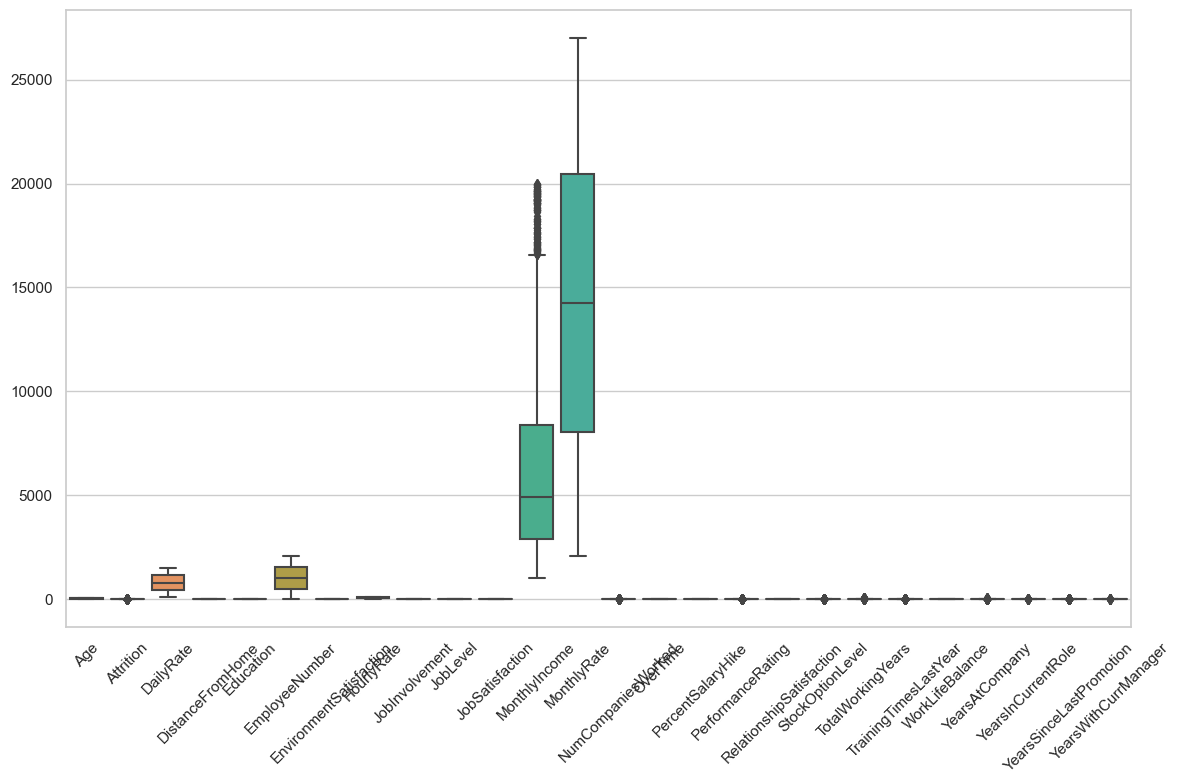

In [115]:
# Aykırı Değerleri Kontrol Etme
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df, ax=ax)
plt.xticks(rotation=45)  # x eksenindeki yazıları 45 derece döndürme
plt.tight_layout()  # Grafikleri daha düzenli hale getirme
plt.show()

In [116]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [117]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [118]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [119]:
# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

        #hepsi baskılandı.

Age False
DailyRate False
DistanceFromHome False
Education False
EmployeeNumber False
HourlyRate False
JobLevel False
MonthlyIncome False
MonthlyRate False
NumCompaniesWorked False
PercentSalaryHike False
TotalWorkingYears False
TrainingTimesLastYear False
YearsAtCompany False
YearsInCurrentRole False
YearsSinceLastPromotion False
YearsWithCurrManager False


In [120]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [121]:
dummy = pd.get_dummies(df[['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus']], drop_first=True)


df = pd.concat([df, dummy], axis=1)

df = df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus'], 1)

In [122]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [123]:
num_churn = df[['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

In [124]:
num_churn .describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1024.865,65.891,2.064,6502.931,14313.103,2.693,15.210,11.280,2.799,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,602.024,20.329,1.107,4707.957,7117.786,2.498,3.660,7.781,1.289,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.000,30.000,1.000,1009.000,2094.000,0.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,491.250,48.000,1.000,2911.000,8047.000,1.000,12.000,6.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1020.500,66.000,2.000,4919.000,14235.500,2.000,14.000,10.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1555.750,83.750,3.000,8379.000,20461.500,4.000,18.000,15.000,3.000,9.000,7.000,3.000,7.000
90%,50.000,1356.000,23.000,4.000,1857.100,94.000,4.000,13775.600,24001.700,7.000,21.000,23.000,5.000,15.000,9.000,7.000,9.000
95%,54.000,1424.100,26.000,4.000,1967.550,97.000,4.000,17821.350,25431.900,8.000,22.000,28.000,5.000,20.000,11.000,9.000,10.000
99%,58.310,1485.000,29.000,5.000,2046.620,100.000,5.000,19626.310,26704.240,9.000,25.000,35.000,6.000,31.000,15.000,14.000,14.000


# BASE MODEL KURULUMU
---

In [125]:
dff = df.copy()
X = dff.drop(['Attrition','EmployeeNumber'], axis=1)
y = dff['Attrition']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [127]:
# Ölçeklendirme yapılacak sütunları seçme (Float değere sahip olanlar)
columns_to_scale = df.columns.tolist()


# Min-Max ölçeklendiriciyi oluşturma
scaler = MinMaxScaler()

# Sütunları ölçeklendirme
dff[columns_to_scale] = scaler.fit_transform(dff[columns_to_scale])

# Ölçeklendirilmiş veri setini görüntüleme
dff.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.548,1.000,0.716,0.000,0.250,0.000,0.333,0.914,0.667,0.250,1.000,0.262,0.698,0.889,1.000,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.150,0.222,0.000,0.294,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
1,0.738,0.000,0.127,0.250,0.000,0.000,0.667,0.443,0.333,0.250,0.333,0.217,0.916,0.111,0.000,0.857,1.000,1.000,0.333,0.250,0.500,0.667,0.250,0.389,0.067,0.412,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
2,0.452,1.000,0.910,0.036,0.250,0.001,1.000,0.886,0.333,0.000,0.667,0.057,0.012,0.667,1.000,0.286,0.000,0.333,0.000,0.175,0.500,0.667,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
3,0.357,0.000,0.923,0.071,0.750,0.002,1.000,0.371,0.667,0.000,0.667,0.100,0.846,0.111,1.000,0.000,0.000,0.667,0.000,0.200,0.500,0.667,0.200,0.389,0.200,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,0.214,0.000,0.350,0.036,0.000,0.003,0.000,0.143,0.667,0.000,0.333,0.129,0.584,1.000,0.000,0.071,0.000,1.000,0.333,0.150,0.500,0.667,0.050,0.111,0.133,0.118,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


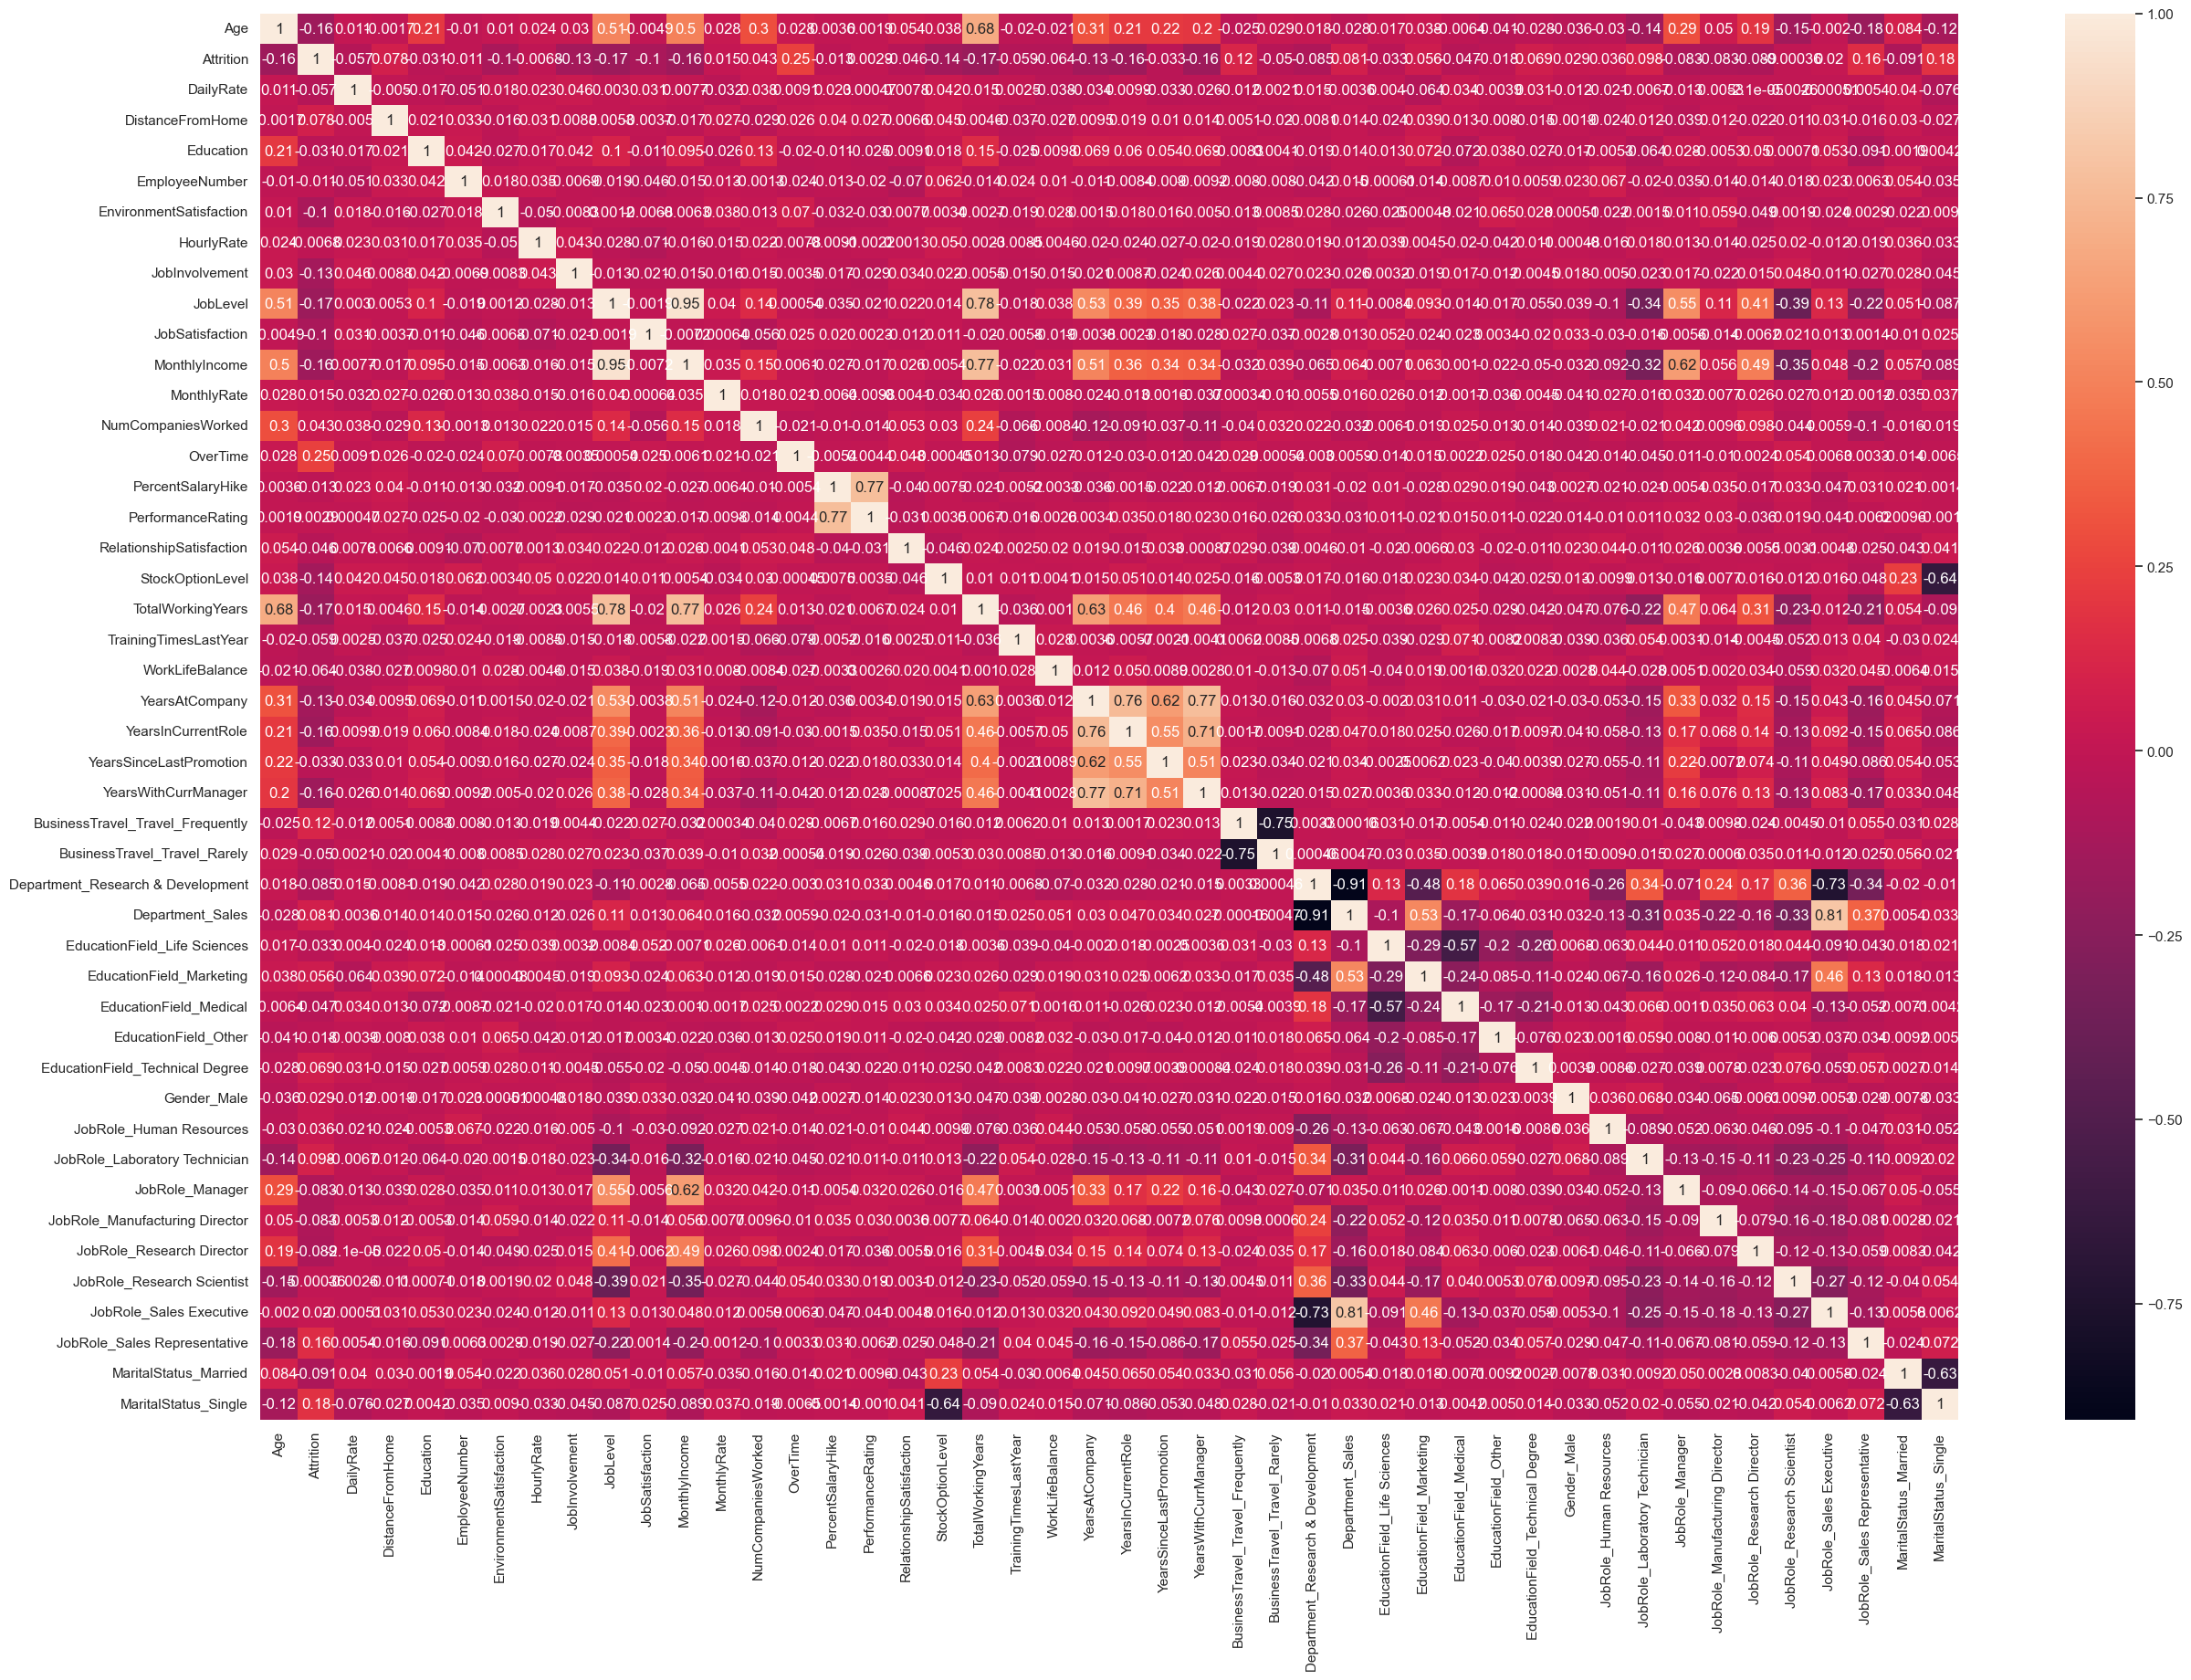

In [128]:
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(dff.corr(),annot = True)
plt.show()

In [129]:
dff.corrwith(df["Attrition"]).sort_values(ascending=False)

Attrition                            1.000
OverTime                             0.246
MaritalStatus_Single                 0.175
JobRole_Sales Representative         0.157
BusinessTravel_Travel_Frequently     0.115
JobRole_Laboratory Technician        0.098
Department_Sales                     0.081
DistanceFromHome                     0.078
EducationField_Technical Degree      0.069
EducationField_Marketing             0.056
NumCompaniesWorked                   0.043
JobRole_Human Resources              0.036
Gender_Male                          0.029
JobRole_Sales Executive              0.020
MonthlyRate                          0.015
PerformanceRating                    0.003
JobRole_Research Scientist          -0.000
HourlyRate                          -0.007
EmployeeNumber                      -0.011
PercentSalaryHike                   -0.013
EducationField_Other                -0.018
Education                           -0.031
EducationField_Life Sciences        -0.033
YearsSinceL

In [130]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")


########## LR ##########
Accuracy: 0.8408
Auc: 0.7052
Recall: 0.0125
Precision: 0.3
F1: 0.024
########## KNN ##########
Accuracy: 0.819
Auc: 0.5857
Recall: 0.1054
Precision: 0.2988
F1: 0.1538
########## CART ##########
Accuracy: 0.7898
Auc: 0.6328
Recall: 0.4011
Precision: 0.3723
F1: 0.3836
########## RF ##########
Accuracy: 0.8578
Auc: 0.8101
Recall: 0.1569
Precision: 0.8017
F1: 0.257
########## XGB ##########
Accuracy: 0.8605
Auc: 0.7999
Recall: 0.3127
Precision: 0.657
F1: 0.4079
########## LightGBM ##########
Accuracy: 0.866
Auc: 0.8087
Recall: 0.3172
Precision: 0.6913
F1: 0.4228
########## CatBoost ##########
Accuracy: 0.8721
Auc: 0.818
Recall: 0.2752
Precision: 0.816
F1: 0.3962


- CatBoost: Yüksek doğruluk (0.8721) ve AUC (0.818) değerlerine sahiptir. Ayrıca, Precision (0.816) ve F1 (0.3962) değerleri de diğer modellere kıyasla daha yüksektir. Bu, CatBoost'un sınıflandırma işleminde daha iyi bir denge sağlamaya yönelik bir performans sergilediğini göstermektedir.

- LightGBM: Yüksek doğruluk (0.866) ve AUC (0.8087) değerlerine sahiptir. Recall (0.3172), Precision (0.6913) ve F1 (0.4228) değerleri de diğer modellere göre daha iyidir. Bu da LightGBM'in dengesiz veri setinizde daha iyi sonuçlar elde etmeye yardımcı olabileceğini göstermektedir.

### Verilen sonuçlara göre, en iyi dört model aşağıdaki gibidir:


- CatBoostClassifier
- LightGBMClassifier
- XGBClassifier
- RandomForestClassifier

In [1]:
df.shape

NameError: name 'df' is not defined

### Neden CatBoost
- Yüksek performans: CatBoost, doğruluk, AUC skoru, hassasiyet ve F1 değeri gibi performans ölçütlerinde diğer modellere kıyasla üstün sonuçlar elde ediyor. Bu, modelin veri setindeki ilişkileri daha iyi yakalayabildiği ve daha doğru tahminler yapabildiği anlamına gelir.

- Kategorik değişkenlere otomatik olarak uyum sağlama: CatBoost, kategorik değişkenlere otomatik olarak uyum sağlayabilen bir modeldir. Bu, kategorik değişkenlerin özel işlemlere veya kodlamalara ihtiyaç duymadan doğrudan modele dahil edilebileceği anlamına gelir. Bu, zaman kazandırır ve modelin daha iyi performans göstermesine yardımcı olur.

- Daha iyi gradyan artırma yöntemi: CatBoost, gradyan artırma yöntemini kullanırken, özel bir özellik olan "simetrik ağaç yapıları" kullanır. Bu, ağaçların dallarını daha simetrik ve dengeli bir şekilde büyütebileceği anlamına gelir, bu da daha iyi bir genelleme yeteneği ve daha iyi bir performans sağlar.

- Otomatik hiperparametre ayarı: CatBoost, otomatik hiperparametre ayarı sunar. Bu, hiperparametrelerin elle ayarlanmasına gerek kalmadan, otomatik olarak en iyi hiperparametre değerlerini bulmasına olanak tanır. Bu, modelin en iyi performansı elde etmek için optimize edilmesine yardımcı olur.

- Genişletilebilirlik: CatBoost, büyük veri setlerinde ve karmaşık problemlerde iyi performans gösterir. Ayrıca, birden fazla giriş formatını destekler ve çoklu hedef problemleri için uygundur. Bu, çeşitli projelerde ve veri setlerinde kullanılabilme esnekliği sağlar.

In [132]:
def fea_eng(df):
    # Yaşı bölen kategorik değişkeni türetme
    df['AgeCategory'] = pd.cut(df['Age'], bins=[18, 35, 50, 65], labels=['Genç', 'Orta Yaşlı', 'Yaşlı'], right=False)
        # Eve Yakın olanlar
    df['CloseToHome'] = df['DistanceFromHome'].apply(lambda x: 'Eve Yakın' if x <= 5 else 'Eve Uzak')
    # Eve Uzak olanlar
    df['FarFromHome'] = df['DistanceFromHome'].apply(lambda x: 'Eve Uzak' if x > 5 else 'Eve Yakın')
    # Yaş ve Meslek Seviyesinin Çarpımı
    df["NEW_Age_JobLevel"] = df["Age"] * df["JobLevel"]
    df["NEW_Education_JobLevel"] = df["Education"] * df["JobLevel"]
    df["NEW_Age_Distance"] = df["Age"] * df["DistanceFromHome"]
    df["NEW_Income_Rate"] = df["MonthlyIncome"] / df["MonthlyRate"]
    df["NEW_Years_Companies"] = df["NumCompaniesWorked"] / df["TotalWorkingYears"]
    df["NEW_PerformanceScore"] = df["PerformanceRating"] * df["PercentSalaryHike"]
    df["NEW_WorkLifeBalance_Score"] = df["JobSatisfaction"] * df["WorkLifeBalance"]
    df['OverTime_Distance'] = df['OverTime'] * df['DistanceFromHome']
    df['NumCompaniesWorked_MonthlyRate_Ratio'] = df['NumCompaniesWorked'] / df['MonthlyRate']
    df['PerformanceRating_Age_Difference'] = df['PerformanceRating'] - df['Age']
    df['EmployeeNumber_PercentSalaryHike_Ratio'] = df['EmployeeNumber'] / df['PercentSalaryHike']
     # Toplam Çalışma Yılı ve Aylık Gelirin Çarpımı
    df["NEW_TotalWorkingYears_MonthlyIncome"] = df["TotalWorkingYears"] * df["MonthlyIncome"]
    # Maaş ve İş Tatmini Ortalamasının Çarpımı
    df["NEW_Income_JobSatisfaction_Multiplication"] = df["MonthlyIncome"] * df["JobSatisfaction"]
    # İş Tatmini ve Çalışma Yaşı Oranı
    df["NEW_JobSatisfaction_YearsAtCompany_Ratio"] = df["JobSatisfaction"] / df["YearsAtCompany"]
    #Çalışanın genel tatmin düzeyini ifade eder.
    df["NEW_SatisfactionScore"] = (df["JobSatisfaction"] + df["EnvironmentSatisfaction"] + df["RelationshipSatisfaction"]) / 3
    #Aylık gelirin aylık oranı. Aylık ücretin aylık ücret oranıyla bölünmesiyle elde edilir.
    df["NEW_MonthlyIncome_Ratio"] = df["MonthlyIncome"] / df["MonthlyRate"]
    #Şu ana kadar geçirilen toplam çalışma yılına göre ortalama iş değişikliği sayısı.
    df["NEW_AvgYearsPerJob"] = df["TotalWorkingYears"] / df["NumCompaniesWorked"].replace(0, 1)
    return df


- **Not:**  
- "YearsAtCompany" sütununda sıfır değerine sahip olmalarıdır. Bu durumda, sıfıra bölme hatası alırsınız.
- Bu hatayı önlemek için, önce "YearsAtCompany" sütununda sıfır değeri kontrolü yapmanız gerekiyor. 
- Eğer değer sıfır ise, NEW_OvertimeRatio sütununa 0 atayabilirsiniz. Aksi takdirde, "OverTime" sütununun değeri "Yes" olan çalışanlar için fazla mesai oranını hesaplayabilirsiniz.
- Eğer "YearsAtCompany" sütunundaki değer sıfırsa, NEW_OvertimeRatio sütununa 0 atanıyor. Aksi takdirde, "OverTime" sütununun değeri "Yes" olan çalışanlar için fazla mesai oranı hesaplanıyor.

In [133]:
df = fea_eng(df)

In [134]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,AgeCategory,CloseToHome,FarFromHome,NEW_Age_JobLevel,NEW_Education_JobLevel,NEW_Age_Distance,NEW_Income_Rate,NEW_Years_Companies,NEW_PerformanceScore,NEW_WorkLifeBalance_Score,OverTime_Distance,NumCompaniesWorked_MonthlyRate_Ratio,PerformanceRating_Age_Difference,EmployeeNumber_PercentSalaryHike_Ratio,NEW_TotalWorkingYears_MonthlyIncome,NEW_Income_JobSatisfaction_Multiplication,NEW_JobSatisfaction_YearsAtCompany_Ratio,NEW_SatisfactionScore,NEW_MonthlyIncome_Ratio,NEW_AvgYearsPerJob
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Orta Yaşlı,Eve Yakın,Eve Yakın,82,4,41,0.308,1.000,33,4,1,0.000,-38,0.091,47944,23972,0.667,2.333,0.308,1.000
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,Orta Yaşlı,Eve Uzak,Eve Uzak,98,2,392,0.206,0.100,92,6,0,0.000,-45,0.087,51300,10260,0.200,3.000,0.206,10.000
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,Orta Yaşlı,Eve Yakın,Eve Yakın,37,2,74,0.872,0.857,45,9,2,0.003,-34,0.267,14630,6270,inf,3.000,0.872,1.167
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,Genç,Eve Yakın,Eve Yakın,33,4,99,0.126,0.125,33,9,3,0.000,-30,0.455,23272,8727,0.375,3.333,0.126,8.000
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,Genç,Eve Yakın,Eve Yakın,27,1,54,0.209,1.500,36,6,0,0.001,-24,0.583,20808,6936,1.000,2.333,0.209,0.667


In [135]:
df.shape

(1470, 66)

In [136]:
# Feature Engineering Sonrası Değişken Tutma İşlemini Tekrarlamalıyız
def grab_col_names(dataframe, cat_th=10, car_th=20):


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}") #tuple'ın ilk elemanı olan satır sayısını belirtir.
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1470
Variables: 66
cat_cols: 36
num_cols: 30
cat_but_car: 0
num_but_cat: 34


In [137]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,AgeCategory,CloseToHome,FarFromHome,NEW_Age_JobLevel,NEW_Education_JobLevel,NEW_Age_Distance,NEW_Income_Rate,NEW_Years_Companies,NEW_PerformanceScore,NEW_WorkLifeBalance_Score,OverTime_Distance,NumCompaniesWorked_MonthlyRate_Ratio,PerformanceRating_Age_Difference,EmployeeNumber_PercentSalaryHike_Ratio,NEW_TotalWorkingYears_MonthlyIncome,NEW_Income_JobSatisfaction_Multiplication,NEW_JobSatisfaction_YearsAtCompany_Ratio,NEW_SatisfactionScore,NEW_MonthlyIncome_Ratio,NEW_AvgYearsPerJob
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Orta Yaşlı,Eve Yakın,Eve Yakın,82,4,41,0.308,1.000,33,4,1,0.000,-38,0.091,47944,23972,0.667,2.333,0.308,1.000
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,Orta Yaşlı,Eve Uzak,Eve Uzak,98,2,392,0.206,0.100,92,6,0,0.000,-45,0.087,51300,10260,0.200,3.000,0.206,10.000
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,Orta Yaşlı,Eve Yakın,Eve Yakın,37,2,74,0.872,0.857,45,9,2,0.003,-34,0.267,14630,6270,inf,3.000,0.872,1.167
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,Genç,Eve Yakın,Eve Yakın,33,4,99,0.126,0.125,33,9,3,0.000,-30,0.455,23272,8727,0.375,3.333,0.126,8.000
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,Genç,Eve Yakın,Eve Yakın,27,1,54,0.209,1.500,36,6,0,0.001,-24,0.583,20808,6936,1.000,2.333,0.209,0.667


In [138]:
df.shape

(1470, 66)

### Feature Engineering Sonrası Eksik Değerleri gözlemleyelim

In [139]:
df.isnull().sum().sum()
    

0

# Feature Engineering Sonrası Aykırı değerleri gözlemleyelim

In [140]:
# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

        #Yeni değişkenlerde Aykırı değerler var baskılama yapalım.

Age False
DailyRate False
DistanceFromHome False
EmployeeNumber False
HourlyRate False
MonthlyIncome False
MonthlyRate False
NumCompaniesWorked False
PercentSalaryHike False
TotalWorkingYears False
YearsAtCompany False
YearsInCurrentRole False
YearsSinceLastPromotion False
YearsWithCurrManager False
NEW_Age_JobLevel False
NEW_Education_JobLevel False
NEW_Age_Distance False
NEW_Income_Rate True
NEW_Years_Companies True
NEW_PerformanceScore False
OverTime_Distance False
NumCompaniesWorked_MonthlyRate_Ratio True
PerformanceRating_Age_Difference False
EmployeeNumber_PercentSalaryHike_Ratio False
NEW_TotalWorkingYears_MonthlyIncome False
NEW_Income_JobSatisfaction_Multiplication False
NEW_JobSatisfaction_YearsAtCompany_Ratio True
NEW_SatisfactionScore False
NEW_MonthlyIncome_Ratio True
NEW_AvgYearsPerJob False


In [141]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [142]:
# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

        #hepsi baskılandı.

Age False
DailyRate False
DistanceFromHome False
EmployeeNumber False
HourlyRate False
MonthlyIncome False
MonthlyRate False
NumCompaniesWorked False
PercentSalaryHike False
TotalWorkingYears False
YearsAtCompany False
YearsInCurrentRole False
YearsSinceLastPromotion False
YearsWithCurrManager False
NEW_Age_JobLevel False
NEW_Education_JobLevel False
NEW_Age_Distance False
NEW_Income_Rate False
NEW_Years_Companies False
NEW_PerformanceScore False
OverTime_Distance False
NumCompaniesWorked_MonthlyRate_Ratio False
PerformanceRating_Age_Difference False
EmployeeNumber_PercentSalaryHike_Ratio False
NEW_TotalWorkingYears_MonthlyIncome False
NEW_Income_JobSatisfaction_Multiplication False
NEW_JobSatisfaction_YearsAtCompany_Ratio False
NEW_SatisfactionScore False
NEW_MonthlyIncome_Ratio False
NEW_AvgYearsPerJob False


In [143]:
# Sınırsız veya çok büyük değerlere sahip özellikleri belirlemek için bir döngü kullanma
for column in X.columns:
    if np.isinf(X[column]).any() or np.max(X[column]) > 1e10:
        print(f"Özellik: {column} - Sınırsız veya çok büyük değerlere sahip")

# Feature Engineering Sonrası Modelleme
---

In [144]:
df.columns = [col.upper() for col in df.columns]
df.head()


,AGE,ATTRITION,DAILYRATE,DISTANCEFROMHOME,EDUCATION,EMPLOYEENUMBER,ENVIRONMENTSATISFACTION,HOURLYRATE,JOBINVOLVEMENT,JOBLEVEL,JOBSATISFACTION,MONTHLYINCOME,MONTHLYRATE,NUMCOMPANIESWORKED,OVERTIME,PERCENTSALARYHIKE,PERFORMANCERATING,RELATIONSHIPSATISFACTION,STOCKOPTIONLEVEL,TOTALWORKINGYEARS,TRAININGTIMESLASTYEAR,WORKLIFEBALANCE,YEARSATCOMPANY,YEARSINCURRENTROLE,YEARSSINCELASTPROMOTION,YEARSWITHCURRMANAGER,BUSINESSTRAVEL_TRAVEL_FREQUENTLY,BUSINESSTRAVEL_TRAVEL_RARELY,DEPARTMENT_RESEARCH & DEVELOPMENT,DEPARTMENT_SALES,EDUCATIONFIELD_LIFE SCIENCES,EDUCATIONFIELD_MARKETING,EDUCATIONFIELD_MEDICAL,EDUCATIONFIELD_OTHER,EDUCATIONFIELD_TECHNICAL DEGREE,GENDER_MALE,JOBROLE_HUMAN RESOURCES,JOBROLE_LABORATORY TECHNICIAN,JOBROLE_MANAGER,JOBROLE_MANUFACTURING DIRECTOR,JOBROLE_RESEARCH DIRECTOR,JOBROLE_RESEARCH SCIENTIST,JOBROLE_SALES EXECUTIVE,JOBROLE_SALES REPRESENTATIVE,MARITALSTATUS_MARRIED,MARITALSTATUS_SINGLE,AGECATEGORY,CLOSETOHOME,FARFROMHOME,NEW_AGE_JOBLEVEL,NEW_EDUCATION_JOBLEVEL,NEW_AGE_DISTANCE,NEW_INCOME_RATE,NEW_YEARS_COMPANIES,NEW_PERFORMANCESCORE,NEW_WORKLIFEBALANCE_SCORE,OVERTIME_DISTANCE,NUMCOMPANIESWORKED_MONTHLYRATE_RATIO,PERFORMANCERATING_AGE_DIFFERENCE,EMPLOYEENUMBER_PERCENTSALARYHIKE_RATIO,NEW_TOTALWORKINGYEARS_MONTHLYINCOME,NEW_INCOME_JOBSATISFACTION_MULTIPLICATION,NEW_JOBSATISFACTION_YEARSATCOMPANY_RATIO,NEW_SATISFACTIONSCORE,NEW_MONTHLYINCOME_RATIO,NEW_AVGYEARSPERJOB
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Orta Yaşlı,Eve Yakın,Eve Yakın,82,4,41,0.308,1.000,33,4,1,0.000,-38,0.091,47944,23972,0.667,2.333,0.308,1.000
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,Orta Yaşlı,Eve Uzak,Eve Uzak,98,2,392,0.206,0.100,92,6,0,0.000,-45,0.087,51300,10260,0.200,3.000,0.206,10.000
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,Orta Yaşlı,Eve Yakın,Eve Yakın,37,2,74,0.872,0.857,45,9,2,0.002,-34,0.267,14630,6270,9.850,3.000,0.872,1.167
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,Genç,Eve Yakın,Eve Yakın,33,4,99,0.126,0.125,33,9,3,0.000,-30,0.455,23272,8727,0.375,3.333,0.126,8.000
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,Genç,Eve Yakın,Eve Yakın,27,1,54,0.209,1.500,36,6,0,0.001,-24,0.583,20808,6936,1.000,2.333,0.209,0.667


In [145]:

# Değişkenlerin tiplerine göre ayrılması işlemi
cat_cols, num_cols, cat_but_car = grab_col_names(df)



Observations: 1470
Variables: 66
cat_cols: 36
num_cols: 30
cat_but_car: 0
num_but_cat: 34


In [146]:
dummy = pd.get_dummies(df[['AGECATEGORY', 'CLOSETOHOME', 'FARFROMHOME']], drop_first=True)


df = pd.concat([df, dummy], axis=1)

df = df.drop(['AGECATEGORY', 'CLOSETOHOME', 'FARFROMHOME'], 1)

In [147]:
X = df.drop(['ATTRITION','EMPLOYEENUMBER'], axis=1)
y = df['ATTRITION']


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [149]:
float_columns = df.select_dtypes(include=['float']).columns
float_columns
#sonsuzluk hatasıı gidermek için. ölçeklendirme yapılmalı.

Index(['NEW_INCOME_RATE', 'NEW_YEARS_COMPANIES', 'NUMCOMPANIESWORKED_MONTHLYRATE_RATIO', 'EMPLOYEENUMBER_PERCENTSALARYHIKE_RATIO',
       'NEW_JOBSATISFACTION_YEARSATCOMPANY_RATIO', 'NEW_SATISFACTIONSCORE', 'NEW_MONTHLYINCOME_RATIO', 'NEW_AVGYEARSPERJOB'],
      dtype='object')

In [150]:
# Ölçeklendirme yapılacak sütunları seçme (Float değere sahip olanlar)
columns_to_scale2 = df.columns.tolist()

# Min-Max ölçeklendiriciyi oluşturma
scaler = MinMaxScaler()

# Sütunları ölçeklendirme
df[columns_to_scale2] = scaler.fit_transform(df[columns_to_scale2])

# Ölçeklendirilmiş veri setini görüntüleme
df.head()

,AGE,ATTRITION,DAILYRATE,DISTANCEFROMHOME,EDUCATION,EMPLOYEENUMBER,ENVIRONMENTSATISFACTION,HOURLYRATE,JOBINVOLVEMENT,JOBLEVEL,JOBSATISFACTION,MONTHLYINCOME,MONTHLYRATE,NUMCOMPANIESWORKED,OVERTIME,PERCENTSALARYHIKE,PERFORMANCERATING,RELATIONSHIPSATISFACTION,STOCKOPTIONLEVEL,TOTALWORKINGYEARS,TRAININGTIMESLASTYEAR,WORKLIFEBALANCE,YEARSATCOMPANY,YEARSINCURRENTROLE,YEARSSINCELASTPROMOTION,YEARSWITHCURRMANAGER,BUSINESSTRAVEL_TRAVEL_FREQUENTLY,BUSINESSTRAVEL_TRAVEL_RARELY,DEPARTMENT_RESEARCH & DEVELOPMENT,DEPARTMENT_SALES,EDUCATIONFIELD_LIFE SCIENCES,EDUCATIONFIELD_MARKETING,EDUCATIONFIELD_MEDICAL,EDUCATIONFIELD_OTHER,EDUCATIONFIELD_TECHNICAL DEGREE,GENDER_MALE,JOBROLE_HUMAN RESOURCES,JOBROLE_LABORATORY TECHNICIAN,JOBROLE_MANAGER,JOBROLE_MANUFACTURING DIRECTOR,JOBROLE_RESEARCH DIRECTOR,JOBROLE_RESEARCH SCIENTIST,JOBROLE_SALES EXECUTIVE,JOBROLE_SALES REPRESENTATIVE,MARITALSTATUS_MARRIED,MARITALSTATUS_SINGLE,NEW_AGE_JOBLEVEL,NEW_EDUCATION_JOBLEVEL,NEW_AGE_DISTANCE,NEW_INCOME_RATE,NEW_YEARS_COMPANIES,NEW_PERFORMANCESCORE,NEW_WORKLIFEBALANCE_SCORE,OVERTIME_DISTANCE,NUMCOMPANIESWORKED_MONTHLYRATE_RATIO,PERFORMANCERATING_AGE_DIFFERENCE,EMPLOYEENUMBER_PERCENTSALARYHIKE_RATIO,NEW_TOTALWORKINGYEARS_MONTHLYINCOME,NEW_INCOME_JOBSATISFACTION_MULTIPLICATION,NEW_JOBSATISFACTION_YEARSATCOMPANY_RATIO,NEW_SATISFACTIONSCORE,NEW_MONTHLYINCOME_RATIO,NEW_AVGYEARSPERJOB,AGECATEGORY_Orta Yaşlı,AGECATEGORY_Yaşlı,CLOSETOHOME_Eve Yakın,FARFROMHOME_Eve Yakın
0,0.548,1.000,0.716,0.000,0.250,0.000,0.333,0.914,0.667,0.250,1.000,0.262,0.698,0.889,1.000,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.150,0.222,0.000,0.294,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.227,0.125,0.014,0.054,0.400,0.000,0.200,0.034,0.169,0.452,0.000,0.062,0.292,0.065,0.444,0.054,0.025,1.000,0.000,1.000,1.000
1,0.738,0.000,0.127,0.250,0.000,0.000,0.667,0.443,0.333,0.250,0.333,0.217,0.916,0.111,0.000,0.857,1.000,1.000,0.333,0.250,0.500,0.667,0.250,0.389,0.067,0.412,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.284,0.042,0.225,0.034,0.040,0.881,0.333,0.000,0.016,0.286,0.000,0.067,0.117,0.018,0.667,0.034,0.250,1.000,0.000,0.000,0.000
2,0.452,1.000,0.910,0.036,0.250,0.001,1.000,0.886,0.333,0.000,0.667,0.057,0.012,0.667,1.000,0.286,0.000,0.333,0.000,0.175,0.500,0.667,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.067,0.042,0.034,0.168,0.343,0.179,0.533,0.069,1.000,0.548,0.001,0.019,0.066,1.000,0.667,0.168,0.029,1.000,0.000,1.000,1.000
3,0.357,0.000,0.923,0.071,0.750,0.002,1.000,0.371,0.667,0.000,0.667,0.100,0.846,0.111,1.000,0.000,0.000,0.667,0.000,0.200,0.500,0.667,0.200,0.389,0.200,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.053,0.125,0.049,0.018,0.050,0.000,0.533,0.103,0.018,0.643,0.002,0.030,0.098,0.035,0.778,0.018,0.200,0.000,0.000,1.000,1.000
4,0.214,0.000,0.350,0.036,0.000,0.003,0.000,0.143,0.667,0.000,0.333,0.129,0.584,1.000,0.000,0.071,0.000,1.000,0.333,0.150,0.500,0.667,0.050,0.111,0.133,0.118,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.032,0.000,0.022,0.034,0.600,0.045,0.333,0.000,0.222,0.786,0.003,0.027,0.075,0.099,0.444,0.034,0.017,0.000,0.000,1.000,1.000


In [151]:
# Random Forests
################################################

rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8, None], # Ağacın maksimum derinliği
             "max_features": [3, 7, "auto"], # En iyi bölünmeyi ararken göz önünde bulundurulması gereken özelliklerin sayısı
             "min_samples_split": [5, 8, 15], # Bir node'u bölmek için gereken minimum örnek sayısı
             "n_estimators": [100, 500]} # Ağaç sayısı

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

rf_best_grid.best_params_ 

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 100}

In [152]:
rf_final = RandomForestClassifier(max_depth=8, max_features=7,min_samples_split=5,n_estimators=100,random_state=17).fit(X, y)
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1","recall","precision","roc_auc"])
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

Accuracy: 0.8565
Auc: 0.8019
Recall: 0.165
Precision: 0.7302
F1: 0.2613


In [153]:
# Hiperparametre ayarlaması
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 8, None],
    'max_features': [3, 7, 'auto'],
    'min_samples_split': [5, 8, 15]
}

rf = RandomForestClassifier(random_state=17)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

cv_results = cross_validate(rf, X, y, cv=5, scoring=['accuracy', 'roc_auc', 'recall', 'precision', 'f1'])

# Sonuçları yazdırma
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"AUC: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

Accuracy: 0.8551
AUC: 0.794
Recall: 0.1732
Precision: 0.7001
F1: 0.2758


-  ########## RF ##########
-  Base Model

- Accuracy: 0.8578
Auc: 0.8101
Recall: 0.1569
Precision: 0.8017
F1: 0.257

- after Feature engineering
Accuracy: 0.8565
Auc: 0.8019
Recall: 0.165
Precision: 0.7302
F1: 0.2613

- Hiperparametre sonrası- final
Accuracy: 0.8551
AUC: 0.794
Recall: 0.1732
Precision: 0.7001
F1: 0.2758
---

- Yorum: Sonuç olarak, RF modeli dengesiz veri setiniz için makul bir seçenek gibi görünmektedir. Ancak, Recall değerinin düşük olması, sınıflandırmada gerçek pozitifleri kaçırma eğilimi olduğunu göstermektedir. .

---

In [154]:
# LightGBM 
################################################

lgbm_model = LGBMClassifier(random_state=17)

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
lgbm_best_grid.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'n_estimators': 500}

In [155]:
lgbm_final = lgbm_model.set_params(colsample_bytree=0.7,learning_rate=0.1,n_estimators=500, random_state=17).fit(X, y)

cv_results = cross_validate(lgbm_final, X, y, cv=10, scoring=["accuracy", "f1","recall","precision","roc_auc"])
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

Accuracy: 0.8633
Auc: 0.8117
Recall: 0.3129
Precision: 0.6906
F1: 0.4148


In [156]:
import lightgbm as lgb
# Hiperparametre ayarlaması
param_grid = {
    'num_leaves': [15, 31, 50],
    'max_depth': [5, 8, -1],
    'learning_rate': [0.1, 0.05, 0.01]
}

lgbm = lgb.LGBMClassifier(random_state=17)

# GridSearchCV ile hiperparametre arama
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi modeli seçme
best_lgbm = grid_search.best_estimator_

# Test veri seti üzerinde tahmin yapma
y_pred = best_lgbm.predict(X_test)

# Sonuçları hesaplama
cv_results = cross_validate(best_lgbm, X, y, cv=5, scoring=['accuracy', 'roc_auc', 'recall', 'precision', 'f1'])

# Sonuçları yazdırma
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"AUC: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

Accuracy: 0.8701
AUC: 0.8138
Recall: 0.3168
Precision: 0.7416
F1: 0.4351


-  ########## LightGBM ##########
-  Base Model

Accuracy: 0.866
Auc: 0.8087
Recall: 0.3172
Precision: 0.6913
F1: 0.4228

- after Feature engineering
Accuracy: 0.8633
Auc: 0.8117
Recall: 0.3129
Precision: 0.6906
F1: 0.4148


- Hiperparametre sonrası
Accuracy: 0.8701
AUC: 0.8138
Recall: 0.3168
Precision: 0.7416
F1: 0.4351
---

- Yorum: Başlangıç modeline göre özellik mühendisliği yapıldığında doğruluk ve AUC değerleri hafif bir düşüş göstermiştir. Ancak, recall, precision ve F1 skorları hemen hemen aynı kalmıştır. Hiperparametre ayarlaması sonrasında ise doğruluk, AUC ve F1 skoru bir miktar artmıştır, ancak recall ve precision değerleri neredeyse aynı kalmıştır. Bu durum, hiperparametre ayarlamasının modelin doğruluk ve sınıflandırma performansını hafif bir şekilde artırabildiğini göstermektedir. Sonuç olarak, özellik mühendisliği ve hiperparametre ayarlaması yapılarak modelin performansı hafif bir şekilde iyileştirilmiştir.

---

In [157]:
# XGBoost
################################################

xgboost_model = XGBClassifier(random_state=17)

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 15],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.5, 0.7, 1]}

xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
xgboost_best_grid.best_params_


Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 12,
 'n_estimators': 500}

In [158]:
xgboost_final = xgboost_model.set_params(max_depth=5, colsample_bytree=0.5,learning_rate=0.01,n_estimators=500, random_state=17).fit(X, y)

cv_results = cross_validate(xgboost_final, X, y, cv=10, scoring=["accuracy", "f1","recall","precision","roc_auc"])
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

Accuracy: 0.866
Auc: 0.8167
Recall: 0.2621
Precision: 0.7658
F1: 0.3763


In [159]:
import xgboost as xgb
# Hiperparametre ayarlaması
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

xgb_model = xgb.XGBClassifier(random_state=17)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

cv_results = cross_validate(xgb_model, X, y, cv=5, scoring=['accuracy', 'roc_auc', 'recall', 'precision', 'f1'])

# Sonuçları yazdırma
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"AUC: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")


Accuracy: 0.866
AUC: 0.8117
Recall: 0.321
Precision: 0.6865
F1: 0.4322


-  ########## XGB ##########
-  Base Model

- Accuracy: 0.8605
Auc: 0.7999
Recall: 0.3127
Precision: 0.657
F1: 0.4079

- after Feature engineering
Accuracy: 0.866
Auc: 0.8167
Recall: 0.2621
Precision: 0.7658
F1: 0.3763

- Hiperparametre sonrası
Accuracy: 0.866
AUC: 0.8117
Recall: 0.321
Precision: 0.6865
F1: 0.4322

---

- Yorum: Başlangıç modeline göre özellik mühendisliği yapıldığında doğruluk ve AUC değerleri artmıştır. Ancak, recall değeri bir miktar düşmüş ve precision değeri ise yükselmiştir. F1 skoru da hafif bir düşüş göstermiştir. Hiperparametre ayarlaması sonrasında doğruluk ve AUC değerleri neredeyse aynı kalmış, recall değeri artmış, precision değeri ise düşmüştür. F1 skoru ise bir miktar artmıştır. Bu durum, özellik mühendisliği ve hiperparametre ayarlamasının XGB modelinin performansını belirli ölçüde iyileştirdiğini göstermektedir.
---

In [160]:
# CatBoost
################################################

catboost_model = CatBoostClassifier(random_state=17, verbose=False)

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
catboost_best_grid.best_params_



Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [161]:
catboost_final = catboost_model.set_params(depth=3, learning_rate=0.01,iterations=500, random_state=17).fit(X, y)

cv_results = cross_validate(catboost_final, X, y, cv=10, scoring=["accuracy", "f1","recall","precision","roc_auc"])

print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

Accuracy: 0.8667
Auc: 0.828
Recall: 0.2114
Precision: 0.8637
F1: 0.3274


In [162]:
# Hiperparametre ayarlaması
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.05, 0.01],
    'iterations': [100, 200, 500]
}

catboost = CatBoostClassifier(random_state=17, verbose=False)

# GridSearchCV ile hiperparametre arama
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi modeli seçme
best_catboost = grid_search.best_estimator_

# Test veri seti üzerinde tahmin yapma
y_pred = best_catboost.predict(X_test)

# Sonuçları hesaplama
cv_results = cross_validate(best_catboost, X, y, cv=5, scoring=['accuracy', 'roc_auc', 'recall', 'precision', 'f1'])

# Sonuçları yazdırma
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"AUC: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

Accuracy: 0.8769
AUC: 0.8238
Recall: 0.3043
Precision: 0.8076
F1: 0.4376


########## CatBoost ##########
-  Base Model

- Accuracy: 0.8721
Auc: 0.818
Recall: 0.2752
Precision: 0.816
F1: 0.3962

- after Feature engineering

- Accuracy: 0.8667
Auc: 0.828
Recall: 0.2114
Precision: 0.8637
F1: 0.3274

- Hiperparametre sonrası
Accuracy: 0.8769
AUC: 0.8238
Recall: 0.3043
Precision: 0.8076
F1: 0.4376
---

- Yorum: Başlangıç modeline göre özellik mühendisliği yapıldığında doğruluk ve AUC değerleri bir miktar düşmüş, recall ve precision değerleri ise önemli ölçüde değişmiştir. F1 skoru da bir miktar düşmüştür. Hiperparametre ayarlaması sonrasında doğruluk ve AUC değerleri biraz daha yükselmiş, recall değeri önemli ölçüde artmış, precision değeri ise düşmüştür. F1 skoru ise belirgin bir şekilde yükselmiştir. Bu durum, özellik mühendisliği ve hiperparametre ayarlamasının CatBoost modelinin performansını iyileştirdiğini göstermektedir.
---

Hiperparametre optimizasyonu sonrası **en iyi sonuçları CatBoost modeli elde etmiştir**. CatBoost, en yüksek accuracy, AUC, precision ve F1 skorlarına sahiptir. Recall değeri LightGBM'den biraz daha düşük olsa da, diğer metriklerde LightGBM'i geride bırakmıştır.

Bu nedenle, hiperparametre optimizasyonu sonrasında CatBoost modelini seçmek daha iyidir. 

In [163]:
################################################
# Feature Importance
################################################
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

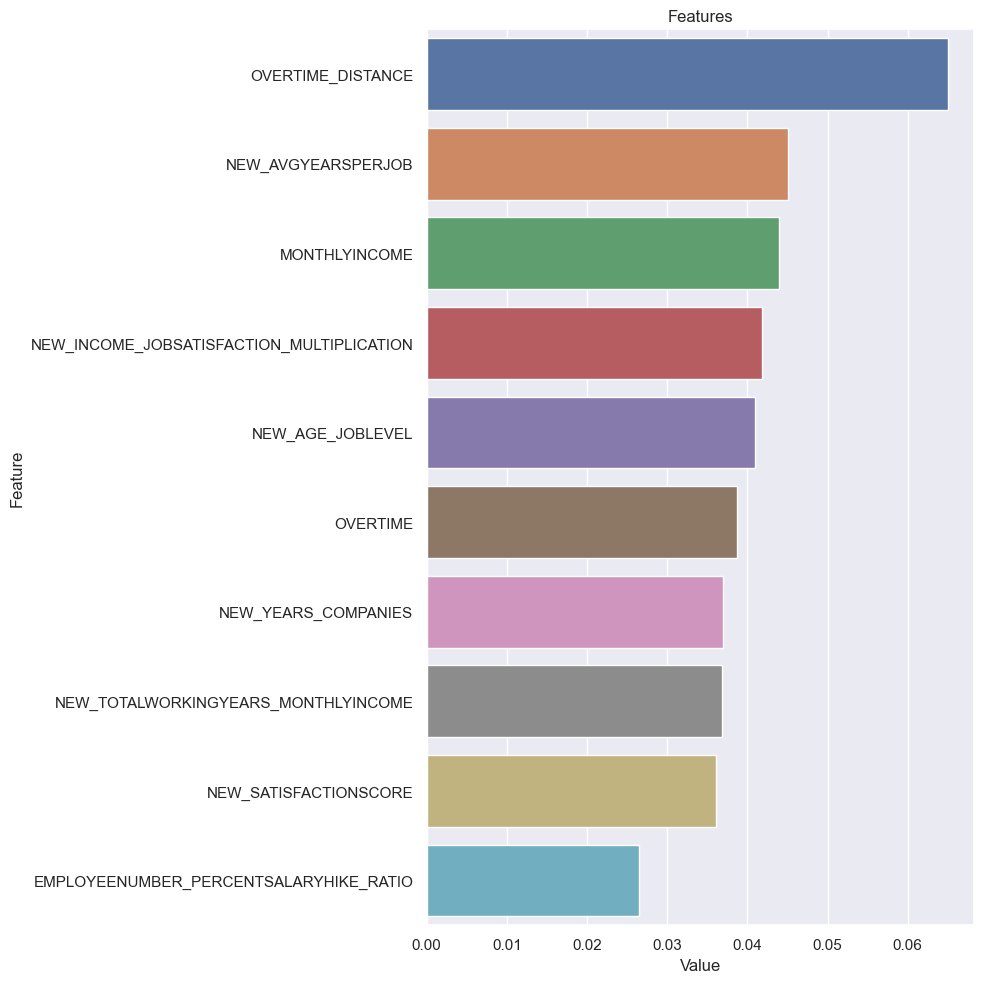

In [164]:
plot_importance(rf_final, X_train, num=10)

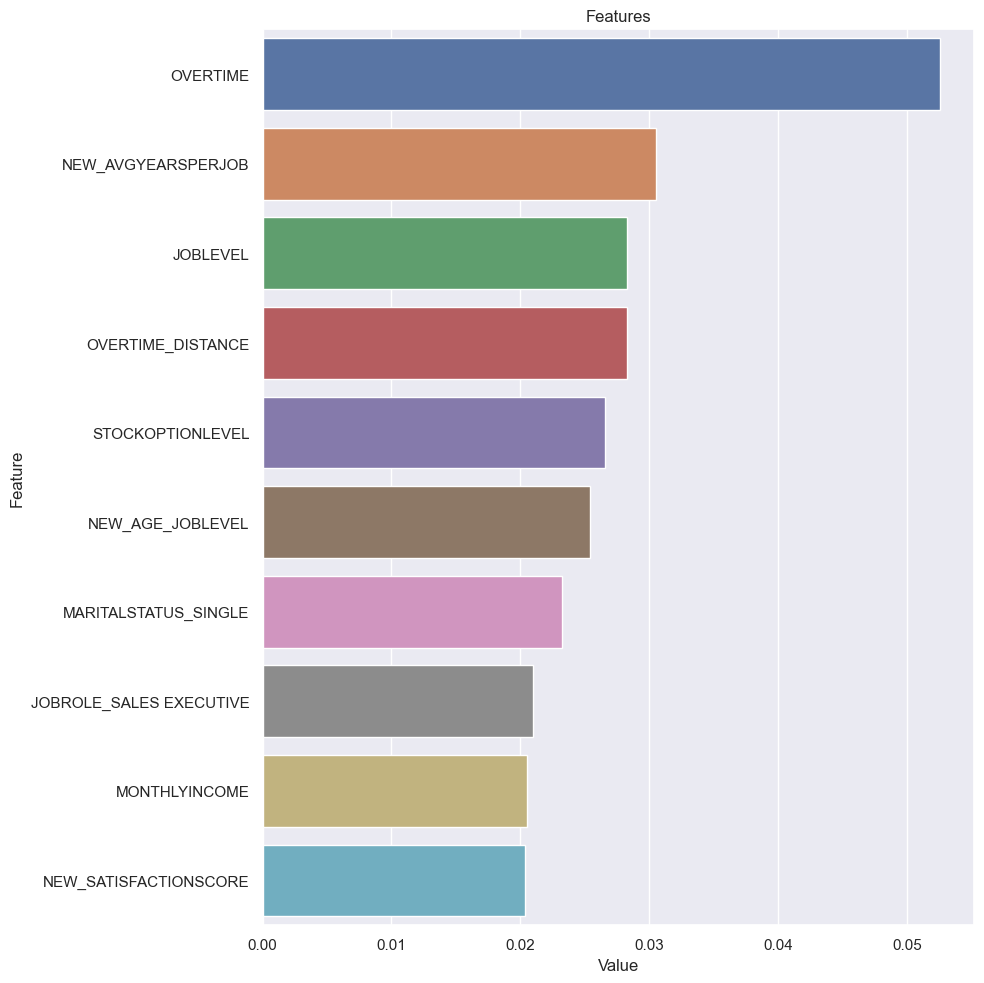

In [165]:
plot_importance(xgboost_final,  X_train, num=10)
# eniyi tahmin etme

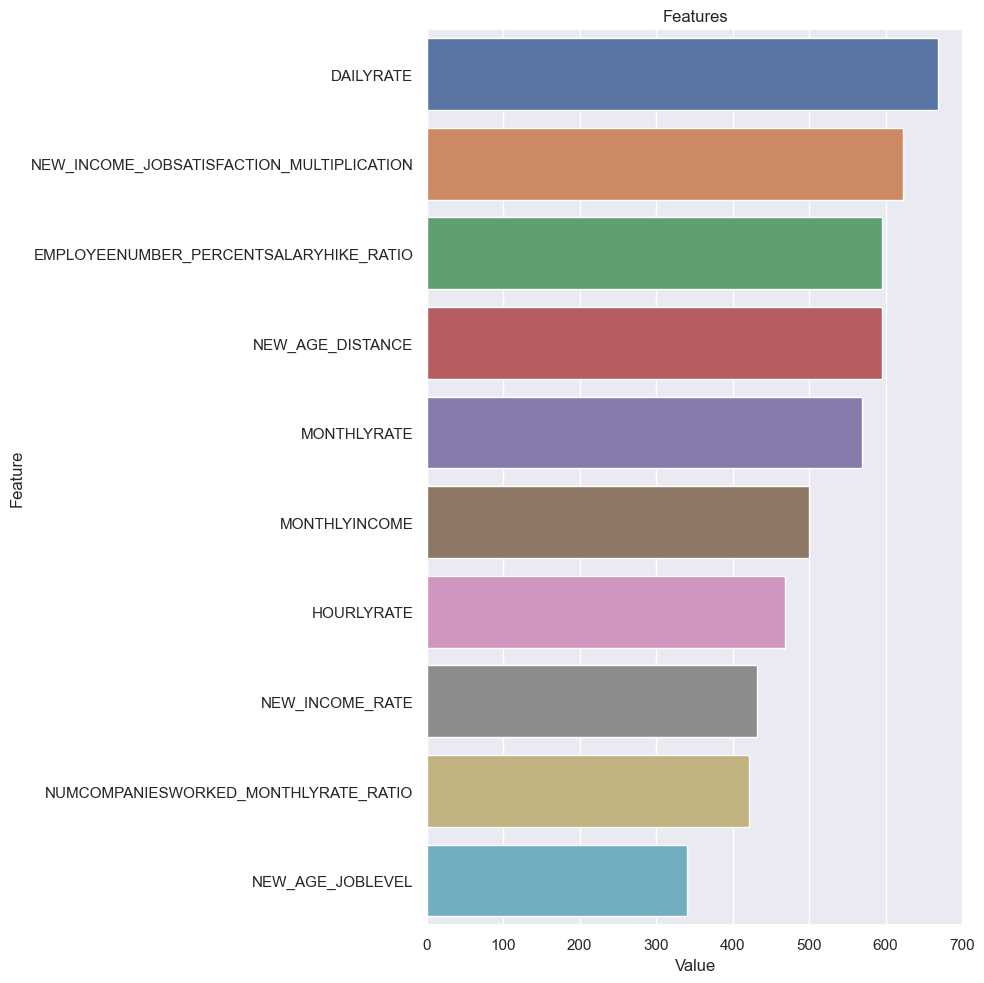

In [166]:
plot_importance(lgbm_final,  X_train, num=10)


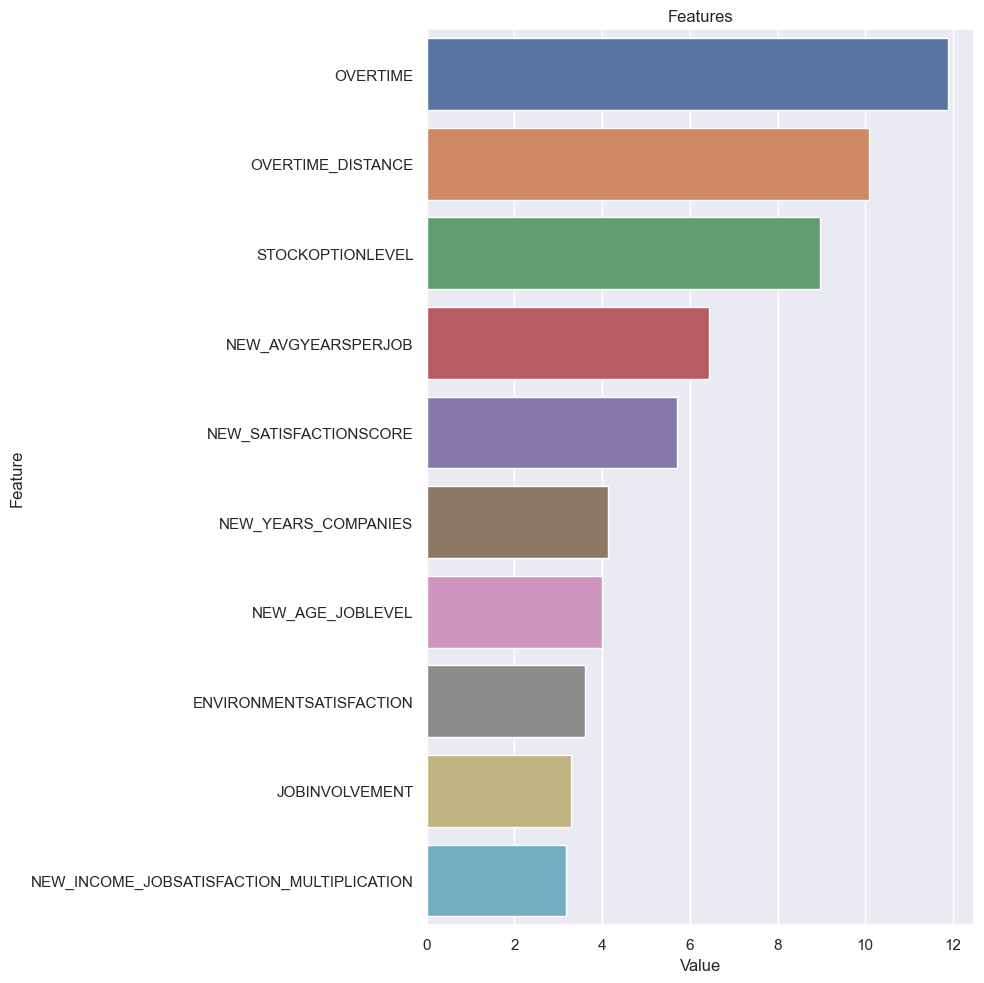

In [167]:
plot_importance(catboost_final, X_train, num=10)    

In [168]:
df.shape

(1470, 67)

- Yeni değişkenlerin seçtiğimiz modele olan etkisini burada gözlemleyebiliriz.

- **OverTime:** Fazla mesai yapma durumu en yüksek etkiye sahip değişken olarak belirlenmiş. Bu, fazla mesai yapmanın çalışanın performansı üzerinde önemli bir etkisi olduğunu gösteriyor. Fazla mesai yapma durumu arttıkça, çalışanın tercih edilme olasılığı da artabilir.

- **OverTime_Distance:** Eve olan mesafe ile fazla mesai yapma durumu arasındaki ilişkiyi ifade eden bir değişken. Bu değişken, fazla mesai yapma eğiliminin eve olan mesafeyle etkileşimini yakalamayı amaçlıyor. Eve olan mesafe arttıkça, fazla mesai yapma olasılığı da etkileniyor.

- **StockOptionLevel:** Çalışanın stok opsiyon seviyesi. Stok opsiyonları, çalışanlara şirket hisselerini belirli bir fiyat üzerinden alma hakkı veren bir teşvik programıdır. StockOptionLevel'ın etkili olması, çalışanların şirket hisselerine olan erişimlerinin performansları üzerinde önemli bir etkiye sahip olduğunu gösterir.

- **NEW_AvgYearsPerJob:** Ortalama iş değişikliği sayısı ile çalışma yılları arasındaki ilişkiyi ifade eder. Bu değişken, çalışanların kariyerlerinde ne kadar sıklıkla iş değiştirdiklerini yansıtır. Çalışanların daha düşük ortalama iş değişikliği sayısına sahip olmaları, iş performansı ve istikrarıyla ilişkilendirilebilir.

- **NEW_SatisfactionScore:** Çalışanın genel tatmin düzeyini ifade eden bir değişken. JobSatisfaction, EnvironmentSatisfaction ve RelationshipSatisfaction değişkenlerinin ortalaması alınarak elde edilir. Tatmin düzeyinin yüksek olması, çalışanın performansını ve bağlılığını etkileyebilir.

- **NEW_Years_Companies:** Toplam çalışma yılı ile şirket değiştirme sayısının oranını ifade eder. Bu değişken, çalışanın iş deneyimi ve şirket değişiklikleri arasındaki ilişkiyi yansıtır. Daha yüksek orana sahip olan çalışanlar, genellikle daha fazla iş deneyimi olan ve işlerinde daha deneyimli olan çalışanlar olarak değerlendirilebilir.

- **NEW_Age_JobLevel:** Yaş ile iş seviyesinin çarpımını ifade eder. Bu değişken, yaş ve iş seviyesinin birleşik etkisini yansıtır. Yaşın ve iş seviyesinin artmasıyla birlikte, çalışanın performansı ve liderlik becerileri de artabilir.

- **EnvironmentSatisfaction:** Çalışanın çevre tatmin düzeyini ifade eden bir değişkendir. Bu değişken, çalışanın iş ortamıyla ilgili memnuniyetini yansıtır. Yüksek EnvironmentSatisfaction skorları, çalışanın iş ortamından memnun olduğunu ve pozitif bir çalışma deneyimi yaşadığını gösterir. Bu da çalışanın motivasyonunu artırabilir, performansını yükseltebilir ve şirkete olan bağlılığını güçlendirebilir.

- **JobInvolvement:** Çalışanın işe katılım düzeyini ifade eder. Bu değişken, çalışanın işe ne kadar bağlı olduğunu ve işe olan ilgisini yansıtır. Yüksek JobInvolvement skorları, çalışanın işe olan katılımının yüksek olduğunu ve işiyle aktif olarak ilgilendiğini gösterir. Bu da çalışanın performansını artırabilir ve iş yerinde daha etkili olmasını sağlayabilir.

- **NEW_Income_JobSatisfaction_Multiplication:** Aylık gelir ile iş tatmininin çarpımını ifade eder.Bu değişken, çalışanın maddi tatmini ile iş tatmini arasındaki etkileşimi yansıtır. Yüksek bir çarpım değeri, çalışanın hem maddi hem de iş tatmini açısından daha memnun olduğunu gösterebilir.


### *Yorum: seçtiğiniz modelde en önemli etkilere sahip olan değişkenleri dikkate alarak stratejik kararlar alabiliriz. Örneğin, fazla mesai yapma durumunu kontrol etmek veya çalışanların çevre tatminini artırmak için iyileştirmeler yapmak gibi. Bu değişkenlerin iş performansı üzerindeki etkilerini göz önünde bulundurarak, çalışanların memnuniyetini artırmak ve performanslarını desteklemek için uygun adımlar atabiliriz.*